In [500]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CollegeRookieStatLog5.csv')
df.head()

Unnamed: 0            Name      School      G    MP   FG   FGA    FG%   2P  \
0           0   Kenyon Martin  Cincinnati  116.0  23.7  4.4   7.5  0.586  4.4   
1           1  Stromile Swift         LSU   50.0  26.6  5.1   9.0  0.560  4.9   
2           2    Marcus Fizer  Iowa State   97.0  32.9  7.1  13.9  0.511  6.9   
3           3      Chris Mihm       Texas   96.0  31.4  5.2  10.4  0.497  5.1   
4           4  Khalid El-Amin       UConn  108.0  30.3  5.4  12.9  0.416  3.6   

    2PA  ...  Year  Pos   #  Wins  Losses   Pts  Rbds  Offense  Defense   Diff  
0   7.5  ...  2000   PF  23    31      51 -1.04 -5.26   105.87   106.99  -1.12  
1   8.4  ...  2000   PF  26    22      60 -5.62  0.27   103.19   109.36  -6.18  
2  13.2  ...  2000   PF  28    17      65 -9.40 -0.74    95.25   105.81 -10.56  
3  10.1  ...  2000    C  28    17      65 -9.40 -0.74    95.25   105.81 -10.56  
4   7.8  ...  2000   PG  28    17      65 -9.40 -0.74    95.25   105.81 -10.56  

[5 rows x 41 columns]

In [501]:
df = df.drop(['Unnamed: 0'], axis=1)

In [502]:
df1 = df.replace('C-', 'C')
df1.head()

Name      School      G    MP   FG   FGA    FG%   2P   2PA  \
0   Kenyon Martin  Cincinnati  116.0  23.7  4.4   7.5  0.586  4.4   7.5   
1  Stromile Swift         LSU   50.0  26.6  5.1   9.0  0.560  4.9   8.4   
2    Marcus Fizer  Iowa State   97.0  32.9  7.1  13.9  0.511  6.9  13.2   
3      Chris Mihm       Texas   96.0  31.4  5.2  10.4  0.497  5.1  10.1   
4  Khalid El-Amin       UConn  108.0  30.3  5.4  12.9  0.416  3.6   7.8   

     2P%  ...  Year  Pos   #  Wins  Losses   Pts  Rbds  Offense  Defense  \
0  0.590  ...  2000   PF  23    31      51 -1.04 -5.26   105.87   106.99   
1  0.585  ...  2000   PF  26    22      60 -5.62  0.27   103.19   109.36   
2  0.524  ...  2000   PF  28    17      65 -9.40 -0.74    95.25   105.81   
3  0.503  ...  2000    C  28    17      65 -9.40 -0.74    95.25   105.81   
4  0.456  ...  2000   PG  28    17      65 -9.40 -0.74    95.25   105.81   

    Diff  
0  -1.12  
1  -6.18  
2 -10.56  
3 -10.56  
4 -10.56  

[5 rows x 40 columns]

In [503]:
df1['Fouls'] = df1['PF']
df1 = df1.drop(['PF'], axis=1)
dum1 = pd.get_dummies(df1['Pos'])
df1 = pd.concat([df1, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1.head()

Name      School      G    MP   FG   FGA    FG%   2P   2PA  \
0   Kenyon Martin  Cincinnati  116.0  23.7  4.4   7.5  0.586  4.4   7.5   
1  Stromile Swift         LSU   50.0  26.6  5.1   9.0  0.560  4.9   8.4   
2    Marcus Fizer  Iowa State   97.0  32.9  7.1  13.9  0.511  6.9  13.2   
3      Chris Mihm       Texas   96.0  31.4  5.2  10.4  0.497  5.1  10.1   
4  Khalid El-Amin       UConn  108.0  30.3  5.4  12.9  0.416  3.6   7.8   

     2P%  ...  Rbds  Offense  Defense   Diff  Fouls  C  PF  PG  SF  SG  
0  0.590  ... -5.26   105.87   106.99  -1.12    2.0  0   1   0   0   0  
1  0.585  ...  0.27   103.19   109.36  -6.18    2.6  0   1   0   0   0  
2  0.524  ... -0.74    95.25   105.81 -10.56    1.9  0   1   0   0   0  
3  0.503  ... -0.74    95.25   105.81 -10.56    1.9  1   0   0   0   0  
4  0.456  ... -0.74    95.25   105.81 -10.56    1.4  0   0   1   0   0  

[5 rows x 44 columns]

In [504]:
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

Name  School      G    MP   FG   FGA    FG%   2P   2PA    2P%  \
0   Kenyon Martin       0  116.0  23.7  4.4   7.5  0.586  4.4   7.5  0.590   
1  Stromile Swift       1   50.0  26.6  5.1   9.0  0.560  4.9   8.4  0.585   
2    Marcus Fizer       2   97.0  32.9  7.1  13.9  0.511  6.9  13.2  0.524   
3      Chris Mihm       3   96.0  31.4  5.2  10.4  0.497  5.1  10.1  0.503   
4  Khalid El-Amin       4  108.0  30.3  5.4  12.9  0.416  3.6   7.8  0.456   

   ...  Rbds  Offense  Defense   Diff  Fouls  C  PF  PG  SF  SG  
0  ... -5.26   105.87   106.99  -1.12    2.0  0   1   0   0   0  
1  ...  0.27   103.19   109.36  -6.18    2.6  0   1   0   0   0  
2  ... -0.74    95.25   105.81 -10.56    1.9  0   1   0   0   0  
3  ... -0.74    95.25   105.81 -10.56    1.9  1   0   0   0   0  
4  ... -0.74    95.25   105.81 -10.56    1.4  0   0   1   0   0  

[5 rows x 44 columns]

In [505]:
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

G    MP   FG   FGA    FG%   2P   2PA    2P%   3P  3PA  \
Name                                                                        
Kenyon Martin   116.0  23.7  4.4   7.5  0.586  4.4   7.5  0.590  0.0  0.1   
Stromile Swift   50.0  26.6  5.1   9.0  0.560  4.9   8.4  0.585  0.2  0.7   
Marcus Fizer     97.0  32.9  7.1  13.9  0.511  6.9  13.2  0.524  0.2  0.7   
Chris Mihm       96.0  31.4  5.2  10.4  0.497  5.1  10.1  0.503  0.1  0.3   
Khalid El-Amin  108.0  30.3  5.4  12.9  0.416  3.6   7.8  0.456  1.8  5.1   

                ...  Rbds  Offense  Defense   Diff  Fouls  C  PF  PG  SF  SG  
Name            ...                                                           
Kenyon Martin   ... -5.26   105.87   106.99  -1.12    2.0  0   1   0   0   0  
Stromile Swift  ...  0.27   103.19   109.36  -6.18    2.6  0   1   0   0   0  
Marcus Fizer    ... -0.74    95.25   105.81 -10.56    1.9  0   1   0   0   0  
Chris Mihm      ... -0.74    95.25   105.81 -10.56    1.9  1   0   0   0   0  
Khalid El-Amin  ... -0.74    95.25   105.81 -10.56    1.4  0   0   1   0   0  

[5 rows x 42 columns]

In [506]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

G    MP   FG   FGA    FG%   2P   2PA    2P%   3P  3PA  \
Name                                                                        
Kenyon Martin   116.0  23.7  4.4   7.5  0.586  4.4   7.5  0.590  0.0  0.1   
Stromile Swift   50.0  26.6  5.1   9.0  0.560  4.9   8.4  0.585  0.2  0.7   
Marcus Fizer     97.0  32.9  7.1  13.9  0.511  6.9  13.2  0.524  0.2  0.7   
Chris Mihm       96.0  31.4  5.2  10.4  0.497  5.1  10.1  0.503  0.1  0.3   
Khalid El-Amin  108.0  30.3  5.4  12.9  0.416  3.6   7.8  0.456  1.8  5.1   

                ...  C  PF  PG  SF  SG  NBATRB  NBAAST  NBASTL  NBABLK  NBAPTS  
Name            ...                                                             
Kenyon Martin   ...  0   1   0   0   0     7.4     1.9     1.1     1.7    12.0  
Stromile Swift  ...  0   1   0   0   0     3.6     0.4     0.8     1.0     4.9  
Marcus Fizer    ...  0   1   0   0   0     4.3     1.1     0.4     0.3     9.5  
Chris Mihm      ...  1   0   0   0   0     4.7     0.3     0.3     0.9     7.6  
Khalid El-Amin  ...  0   0   1   0   0     1.6     2.9     1.0     0.0     6.3  

[5 rows x 42 columns]

In [507]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['NBATRB','NBAAST','NBASTL','NBABLK']
for du in dum:
    cols.remove(du)

In [508]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
#df1['NBAPTS'] = sc2.fit_transform(df1['NBAPTS'])
sc3 = StandardScaler()
df1[['NBABLK']] = sc3.fit_transform(df1[['NBABLK']])
sc4 = StandardScaler()
df1[['NBASTL']] = sc4.fit_transform(df1[['NBASTL']])
sc5 = StandardScaler()
df1[['NBAAST']] = sc5.fit_transform(df1[['NBAAST']])
sc6 = StandardScaler()
df1[['NBATRB']] = sc6.fit_transform(df1[['NBATRB']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

G        MP        FG       FGA       FG%        2P  \
Name                                                                         
Kenyon Martin   0.797162 -1.099515 -0.278510 -0.913785  1.909497  0.532800   
Stromile Swift -0.973751 -0.470289  0.263631 -0.375484  1.450974  0.917797   
Marcus Fizer    0.287354  0.896649  1.812606  1.382964  0.586836  2.457786   
Chris Mihm      0.260522  0.571188  0.341080  0.126929  0.339939  1.071796   
Khalid El-Amin  0.582506  0.332516  0.495977  1.024097 -1.088535 -0.083195   

                     2PA       2P%        3P       3PA  ...         C  \
Name                                                    ...             
Kenyon Martin   0.149737  1.352696 -1.372758 -1.418764  ... -0.336668   
Stromile Swift  0.534145  1.259332 -1.111831 -1.115597  ... -0.336668   
Marcus Fizer    2.584320  0.120285 -1.111831 -1.115597  ... -0.336668   
Chris Mihm      1.260249 -0.271845 -1.242295 -1.317709  ...  2.970283   
Khalid El-Amin  0.277873 -1.149472  0.975584  1.107632  ... -0.336668   

                      PF        PG        SF        SG    NBATRB    NBAAST  \
Name                                                                         
Kenyon Martin   1.967740 -0.559017 -0.477308 -0.607074  2.638092  0.490424   
Stromile Swift  1.967740 -0.559017 -0.477308 -0.607074  0.633010 -0.592231   
Marcus Fizer    1.967740 -0.559017 -0.477308 -0.607074  1.002368 -0.086992   
Chris Mihm     -0.508197 -0.559017 -0.477308 -0.607074  1.213429 -0.664408   
Khalid El-Amin -0.508197  1.788854 -0.477308 -0.607074 -0.422296  1.212195   

                  NBASTL    NBABLK    NBAPTS  
Name                                          
Kenyon Martin   1.580453  4.462180  1.549026  
Stromile Swift  0.809016  2.281977 -0.124888  
Marcus Fizer   -0.219566  0.101773  0.959619  
Chris Mihm     -0.476712  1.970519  0.511671  
Khalid El-Amin  1.323307 -0.832599  0.205179  

[5 rows x 42 columns]

In [509]:
df3 = df1[0:559]
df4 = df1[559:]

In [510]:
df4.head()

G        MP        FG       FGA       FG%  \
Name                                                                         
Zion Williamson          -1.429895  0.267424  3.284132  1.131757  3.567232   
Jaxson Hayes             -1.456728 -1.186305 -0.743203 -1.703292  4.413735   
Nickeil Alexander-Walker -0.517607  0.245726 -0.046164  0.019269 -0.242032   
RJ Barrett               -1.295735  1.417388  2.819440  3.033751 -0.418387   
Ignas Brazdeikis         -1.322567  0.180634  0.263631  0.342249 -0.277303   

                                2P       2PA       2P%        3P       3PA  \
Name                                                                         
Zion Williamson           3.458778  1.644657  4.284341 -0.459514 -0.357678   
Jaxson Hayes              0.070804 -0.789926  3.929556 -1.372758 -1.469292   
Nickeil Alexander-Walker -0.545191 -0.661790  0.213650  0.845120  0.804464   
RJ Barrett                2.149788  2.157201  0.213650  1.106047  1.663439   
Ignas Brazdeikis         -0.083195 -0.021111 -0.327864  0.584193  0.501297   

                          ...         C        PF        PG        SF  \
Name                      ...                                           
Zion Williamson           ... -0.336668  1.967740 -0.559017 -0.477308   
Jaxson Hayes              ... -0.336668  1.967740 -0.559017 -0.477308   
Nickeil Alexander-Walker  ... -0.336668 -0.508197 -0.559017 -0.477308   
RJ Barrett                ... -0.336668 -0.508197 -0.559017 -0.477308   
Ignas Brazdeikis          ... -0.336668 -0.508197 -0.559017  2.095085   

                                SG    NBATRB    NBAAST    NBASTL    NBABLK  \
Name                                                                         
Zion Williamson          -0.607074 -1.266541 -0.880939 -1.248148 -0.832599   
Jaxson Hayes             -0.607074 -1.266541 -0.880939 -1.248148 -0.832599   
Nickeil Alexander-Walker  1.647245 -1.266541 -0.880939 -1.248148 -0.832599   
RJ Barrett                1.647245 -1.266541 -0.880939 -1.248148 -0.832599   
Ignas Brazdeikis         -0.607074 -1.266541 -0.880939 -1.248148 -0.832599   

                            NBAPTS  
Name                                
Zion Williamson          -1.280125  
Jaxson Hayes             -1.280125  
Nickeil Alexander-Walker -1.280125  
RJ Barrett               -1.280125  
Ignas Brazdeikis         -1.280125  

[5 rows x 42 columns]

In [544]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [37], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [37], axis=1)
test_x=tests[0]
test_y=tests[1]

In [545]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [546]:
test_y.tail()

NBATRB    NBAAST    NBASTL    NBABLK    NBAPTS
Name                                                            
Jacob Evans    -0.844418 -0.303523 -0.733857 -0.521142 -0.973634
Gary Trent      0.527480 -0.375700 -0.219566 -0.209684  0.488094
Hamidou Diallo -0.264000 -0.664408 -0.219566 -0.209684 -0.407803
Chimezie Metu  -0.633357 -0.592231 -0.733857 -0.521142 -0.855752
Thomas Welsh   -1.055480 -0.520054 -1.248148 -0.832599 -0.902905

## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


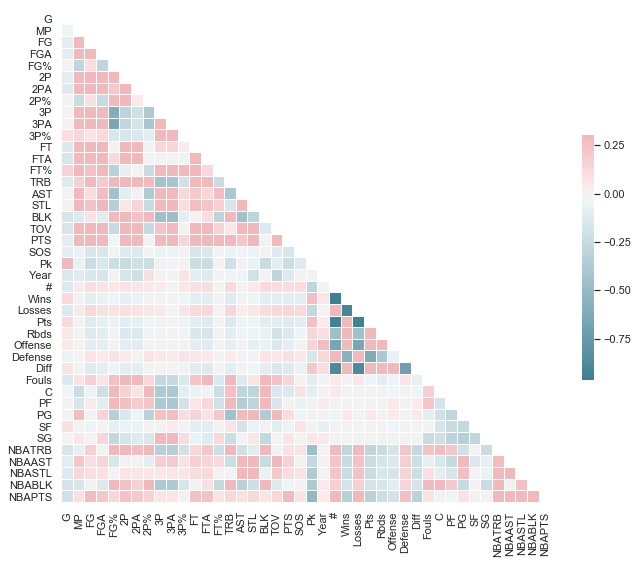

In [547]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Feature Selection

In [548]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 30)
reg = rfe.fit(train_x.values, train_y.NBAPTS.values)
print(reg.support_)
print(reg.ranking_)

[False  True  True  True  True  True  True  True  True  True  True  True
 False False  True  True  True False  True  True False  True  True  True
  True  True  True  True  True  True  True False  True  True  True False
  True]
[4 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 8 1 1 6 1 1 1 1 1 1 1 1 1 1 5 1 1 1 7 1]


In [515]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=4, n_estimators=1000,bootstrap=True).fit(train_x.values, train_y.NBAPTS.values)
reg.feature_importances_

array([0.02222764, 0.01728174, 0.02502246, 0.02118001, 0.0175208 ,
       0.01841157, 0.01668924, 0.02051671, 0.01279254, 0.01246122,
       0.01329423, 0.01710903, 0.01587694, 0.01469454, 0.01612215,
       0.01688678, 0.02084707, 0.01348514, 0.01404931, 0.02575744,
       0.01907401, 0.33080689, 0.0214407 , 0.03054885, 0.03254369,
       0.02973122, 0.02471296, 0.0206899 , 0.01737892, 0.02131366,
       0.02330061, 0.01550162, 0.00559009, 0.01944581, 0.0134281 ,
       0.00974907, 0.01251733])

In [549]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,37):
    if reg.support_[x]:
        picks.append(cols[x])
train_x=train_x[picks]
test_x=test_x[picks]
train_x.head()

MP        FG       FGA       FG%        2P       2PA  \
Name                                                                         
Kenyon Martin  -1.099515 -0.278510 -0.913785  1.909497  0.532800  0.149737   
Stromile Swift -0.470289  0.263631 -0.375484  1.450974  0.917797  0.534145   
Marcus Fizer    0.896649  1.812606  1.382964  0.586836  2.457786  2.584320   
Chris Mihm      0.571188  0.341080  0.126929  0.339939  1.071796  1.260249   
Khalid El-Amin  0.332516  0.495977  1.024097 -1.088535 -0.083195  0.277873   

                     2P%        3P       3PA       3P%  ...    Losses  \
Name                                                    ...             
Kenyon Martin   1.352696 -1.372758 -1.418764 -1.076423  ...  0.587821   
Stromile Swift  1.259332 -1.111831 -1.115597 -0.889632  ...  1.353469   
Marcus Fizer    0.120285 -1.111831 -1.115597 -0.422656  ...  1.778829   
Chris Mihm     -0.271845 -1.242295 -1.317709 -0.347940  ...  1.778829   
Khalid El-Amin -1.149472  0.975584  1.107632  0.165734  ...  1.778829   

                     Pts      Rbds   Offense   Defense      Diff         C  \
Name                                                                         
Kenyon Martin   0.026335 -1.903918 -0.094554 -0.042141 -0.040452 -0.336668   
Stromile Swift -1.018824  0.150670 -0.761842  0.587438 -0.966420 -0.336668   
Marcus Fizer   -1.881423 -0.224580 -2.738805 -0.355602 -1.767950 -0.336668   
Chris Mihm     -1.881423 -0.224580 -2.738805 -0.355602 -1.767950  2.970283   
Khalid El-Amin -1.881423 -0.224580 -2.738805 -0.355602 -1.767950 -0.336668   

                      PF        PG        SG  
Name                                          
Kenyon Martin   1.967740 -0.559017 -0.607074  
Stromile Swift  1.967740 -0.559017 -0.607074  
Marcus Fizer    1.967740 -0.559017 -0.607074  
Chris Mihm     -0.508197 -0.559017 -0.607074  
Khalid El-Amin -0.508197  1.788854 -0.607074  

[5 rows x 30 columns]

## Linear Regression

In [550]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([-2.52829317e-01, -6.70765974e-01, -2.04067657e+00,  7.69455878e-02,
        9.93639821e-02,  1.91009437e+00,  1.12474987e-01,  1.00863669e-01,
        1.45741925e+00, -4.32587737e-02, -1.57469823e-01,  1.55671133e-01,
        1.77209480e-01,  3.74454274e-02, -7.55777409e-02,  7.65616408e-01,
       -3.60285584e-01,  7.06819274e-02, -2.63799219e-01, -2.86412556e-01,
        2.42800739e-01,  2.44535818e-01, -5.09274625e-02, -2.93689659e+01,
        2.75755858e+01,  3.98049556e+01, -4.46696089e-02, -9.68276596e-02,
        1.07255359e-01,  4.87855375e-02])

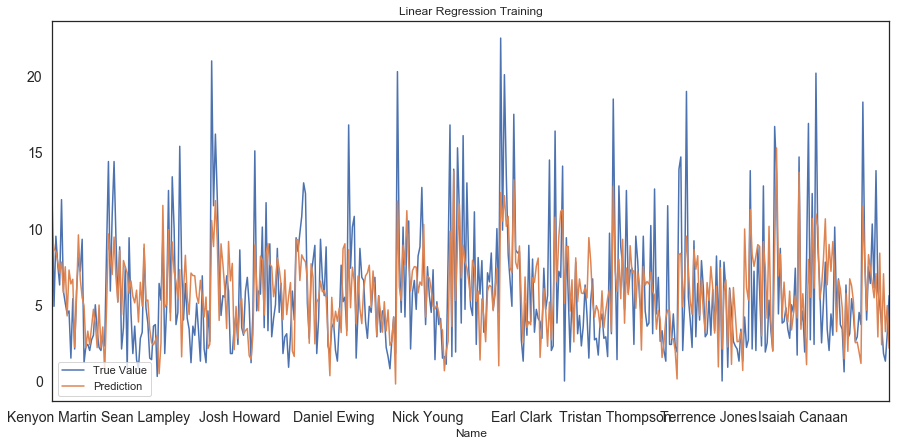

adj train r^2 = 0.3651313268633447
train mse = 9.823986124812413


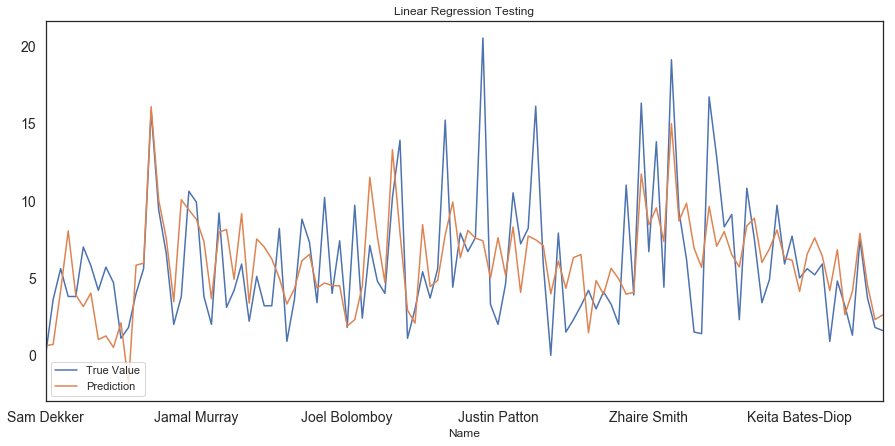

adj test r^2 = 0.30333060471508877
test mse = 11.21652709231796


In [551]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

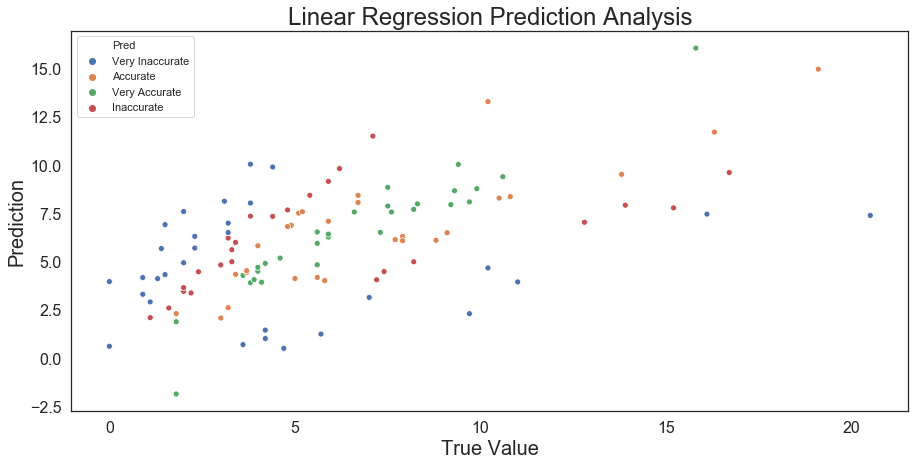

This model is able to relatively accurately predict 25.0% of NBA Rookies.
This model is able to very accurately predict 25.89% of NBA Rookies.


In [552]:
import seaborn as sns
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Linear Regression Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

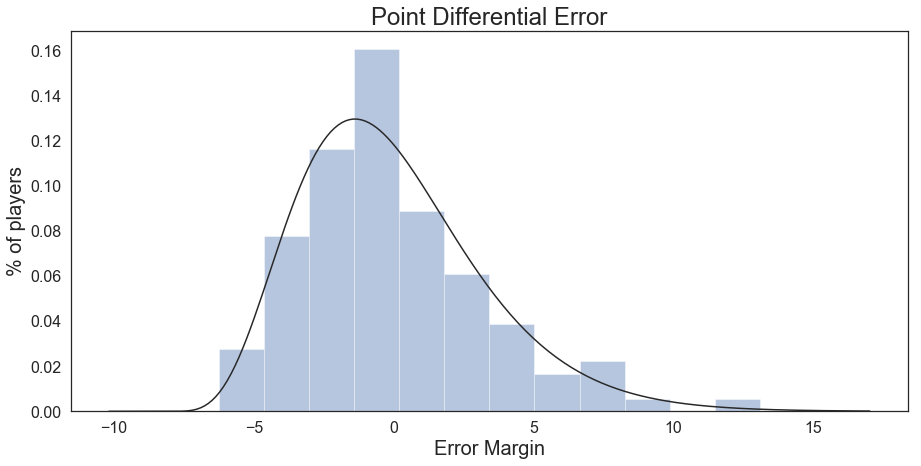

This model is able to relatively accurately predict 48.21% of NBA Rookies within 2 points.


In [553]:
from scipy import stats
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

## Extra Trees

In [554]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=22, n_estimators=1000,max_depth=4, bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=4,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=22,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

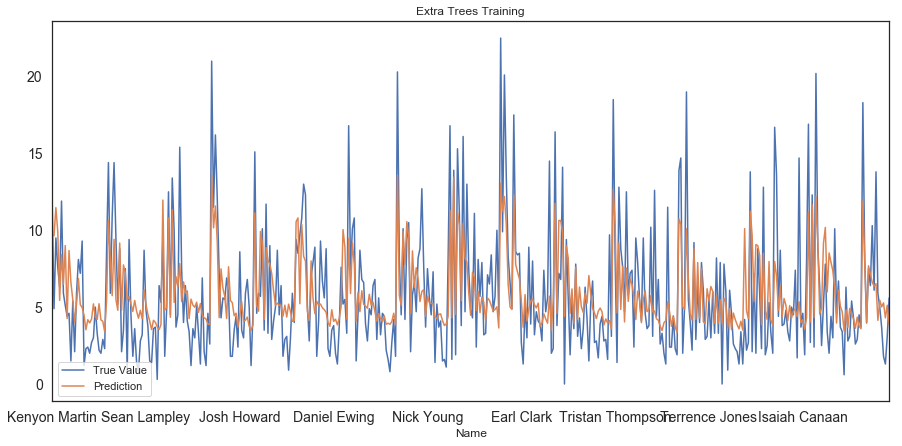

adj train r^2 = 0.47171905275175685
train mse = 8.174642907057395


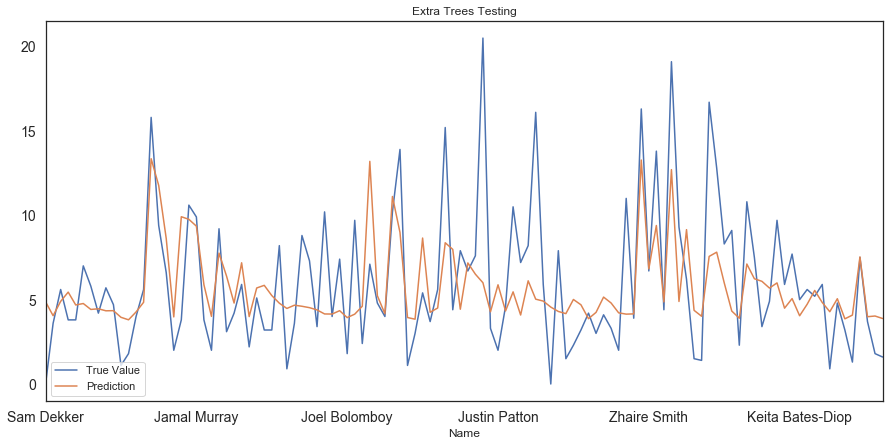

adj test r^2 = 0.2972474264972724
test mse = 11.314467569895035


In [555]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

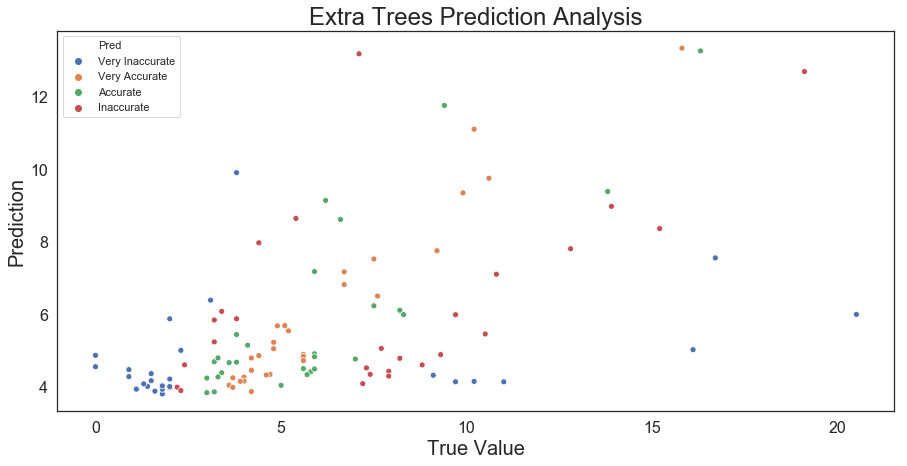

This model is able to relatively accurately predict 25.0% of NBA Rookies.
This model is able to very accurately predict 26.79% of NBA Rookies.


In [556]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Extra Trees Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

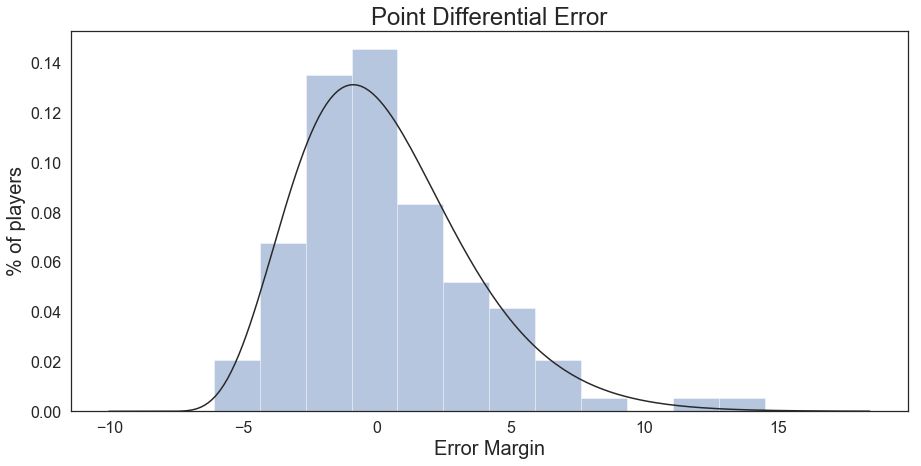

This model is able to relatively accurately predict 46.43% of NBA Rookies within 2 points.


In [557]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

## Cross Validated Extra Trees

In [558]:
from sklearn.model_selection import cross_val_score
cross_x = train_x.append(test_x, ignore_index = True)
cross_y = train_y.append(test_y, ignore_index = True)
cross_x = cross_x.set_index(df3.index)
cross_y = cross_y.set_index(df3.index)
cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')

array([0.38550346, 0.44894439, 0.42921042, 0.29569662, 0.34167755])

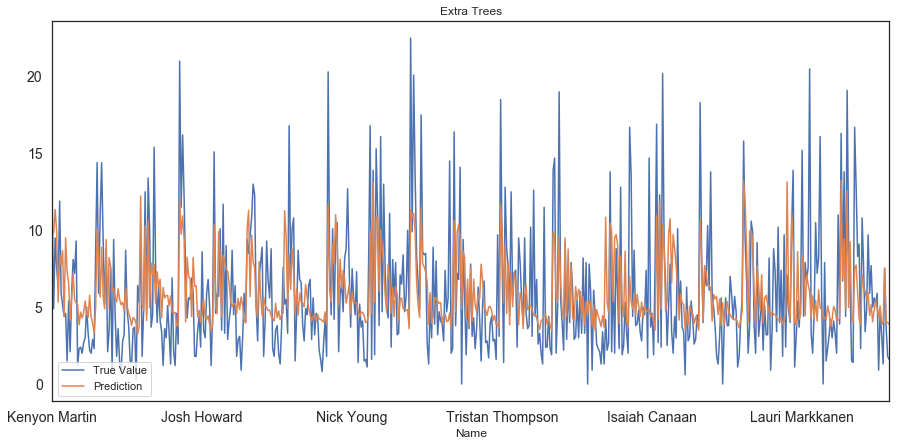

adj overall r^2 = 0.3377024197335744
overall mse = 10.333138189213754


In [559]:
from sklearn.model_selection import cross_val_predict
train_y2 = cross_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(cross_val_predict(reg, cross_x, cross_y.NBAPTS, cv=5))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj overall r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('overall mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

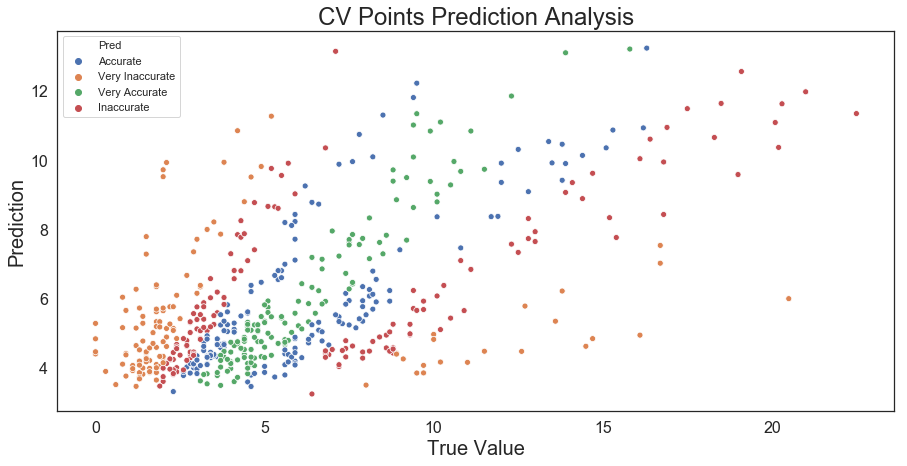

This model is able to relatively accurately predict 27.19% of NBA Rookies.
This model is able to very accurately predict 24.69% of NBA Rookies.
adj overall r^2 = 0.3377024197335744
overall mse = 10.333138189213754


In [560]:
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=train_y2)
ax.set_title("CV Points Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Very Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")
print('adj overall r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('overall mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

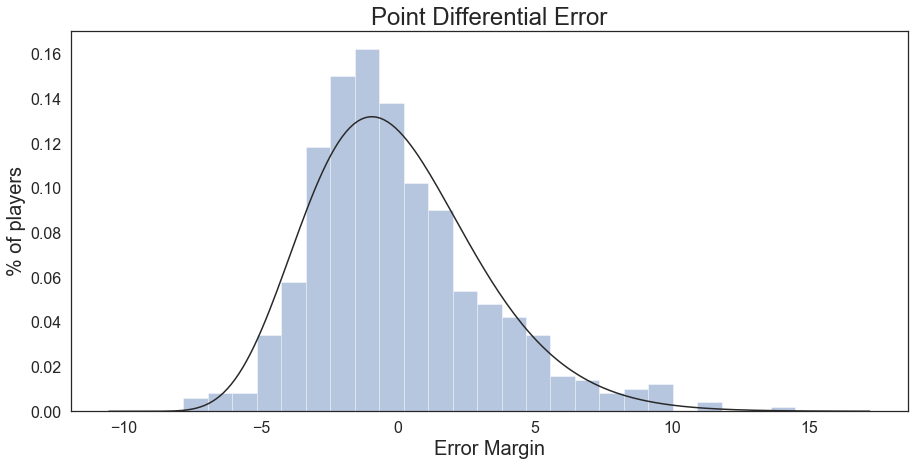

This model is able to relatively accurately predict 49.73% of NBA Rookies within 2 points.


In [561]:
train_y2['chip'] = (train_y2['NBAPTS'] - train_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = train_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(train_y2[abs(train_y2['chip'])<=2])/len(train_y2),2)) + "% of NBA Rookies within 2 points.")

## Grid Search on Extra Trees

In [562]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth': np.arange(2,28,2),
              'min_samples_split': np.arange(2,11),
              'bootstrap': [True, False],
              'n_estimators': [200,800]}

grid = RandomizedSearchCV(ExtraTreesRegressor(), param_grid, n_iter=10, cv=5)

In [563]:
grid.fit(cross_x, cross_y);

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [564]:
grid.best_params_

{'n_estimators': 800,
 'min_samples_split': 9,
 'max_depth': 8,
 'bootstrap': True}

In [565]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=8, n_estimators=200, max_depth=8, bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=8,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=8,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

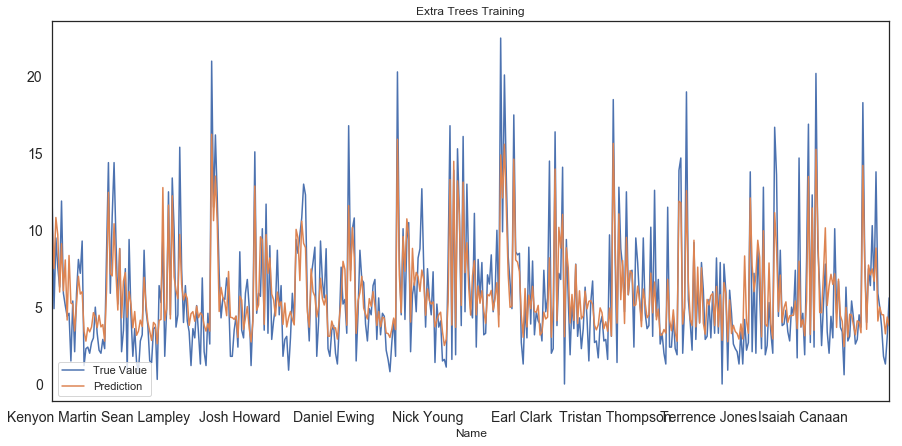

adj train r^2 = 0.7244822567759084
train mse = 4.26337383005586


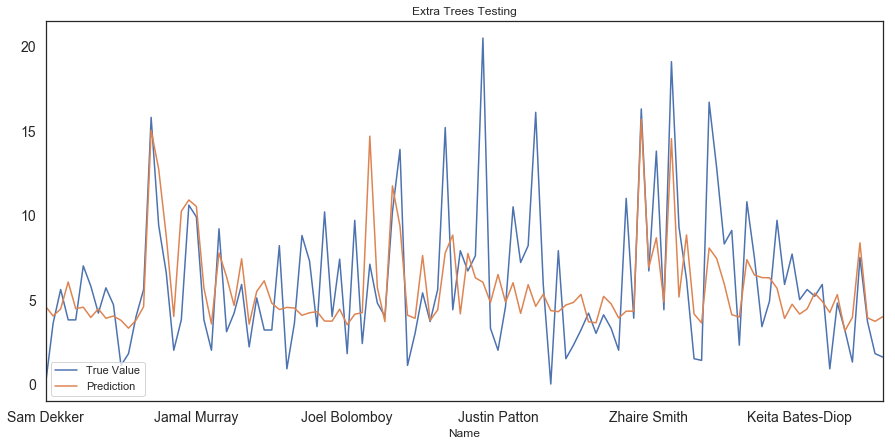

adj test r^2 = 0.28153891638638484
test mse = 11.56737796100912


In [566]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

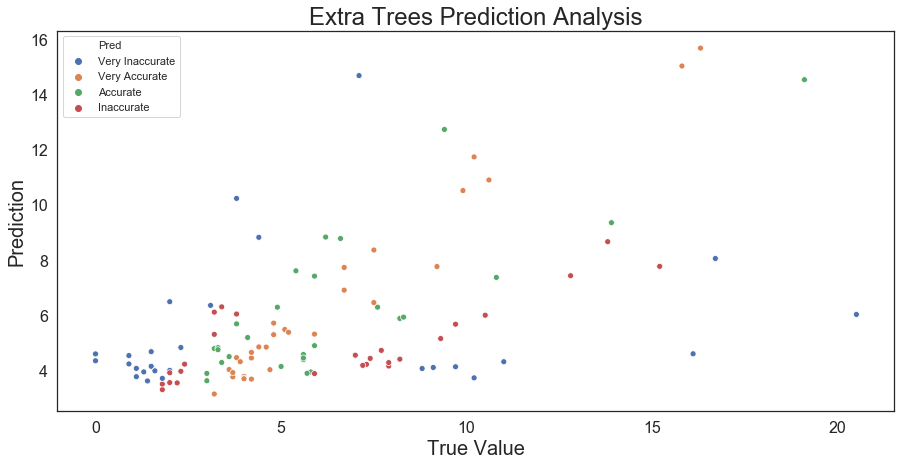

This model is able to relatively accurately predict 25.89% of NBA Rookies.
This model is able to very accurately predict 26.79% of NBA Rookies.


In [567]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Extra Trees Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

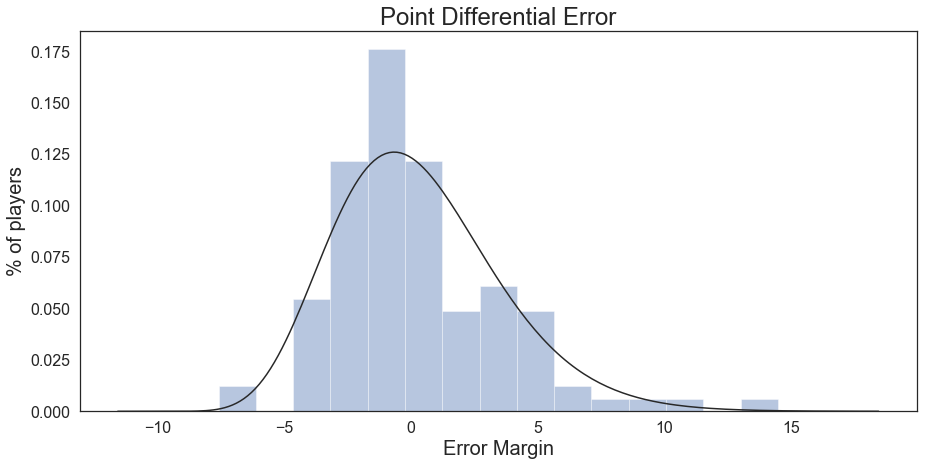

This model is able to relatively accurately predict 51.79% of NBA Rookies within 2 points.


In [568]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

## Random Forrest

In [569]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000, max_depth=5, min_samples_split=14)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

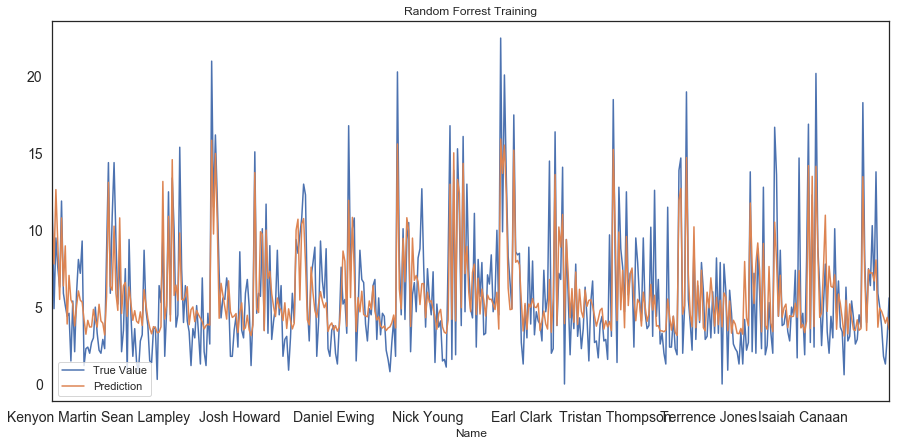

adj train r^2 = 0.6527590972661441
train mse = 5.373221194819384


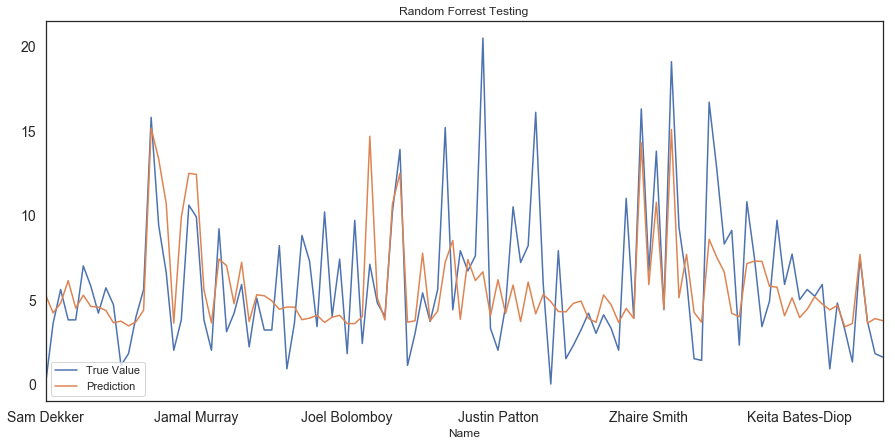

adj test r^2 = 0.29379938617418355
test mse = 11.369981760644745


In [570]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

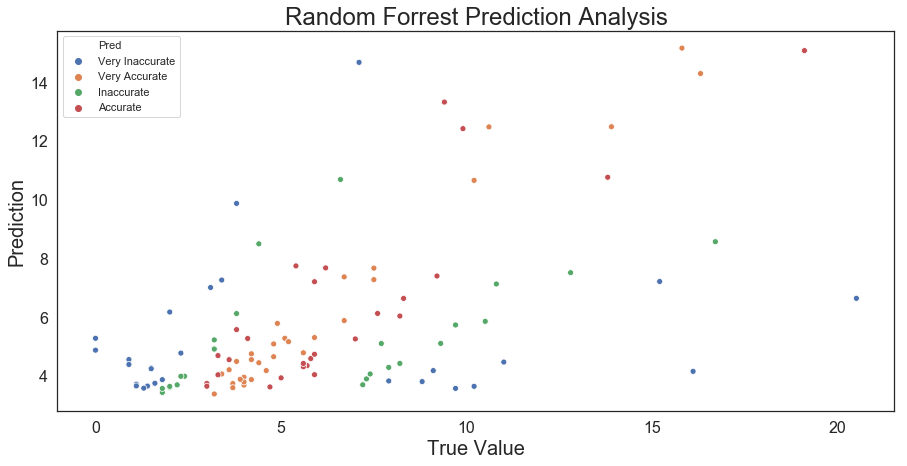

This model is able to relatively accurately predict 25.0% of NBA Rookies.
This model is able to very accurately predict 27.68% of NBA Rookies.


In [571]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

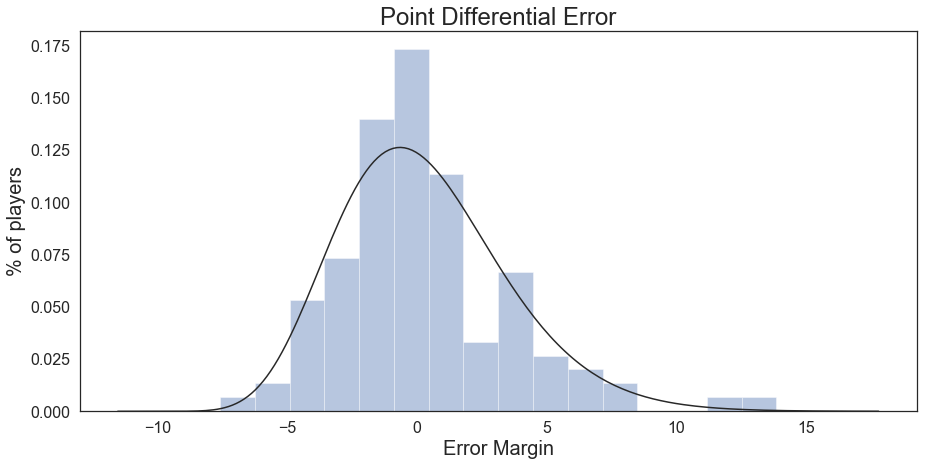

This model is able to relatively accurately predict 55.36% of NBA Rookies within 2 points.


In [572]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

## XGBoost

In [573]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [574]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000, max_depth=16, reg_lambda=.48, gamma=.3, booster='gblinear')
reg.fit(train_x.values, train_y.NBAPTS.values)

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.3, learning_rate=0.1, max_delta_step=0,
       max_depth=16, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.48, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

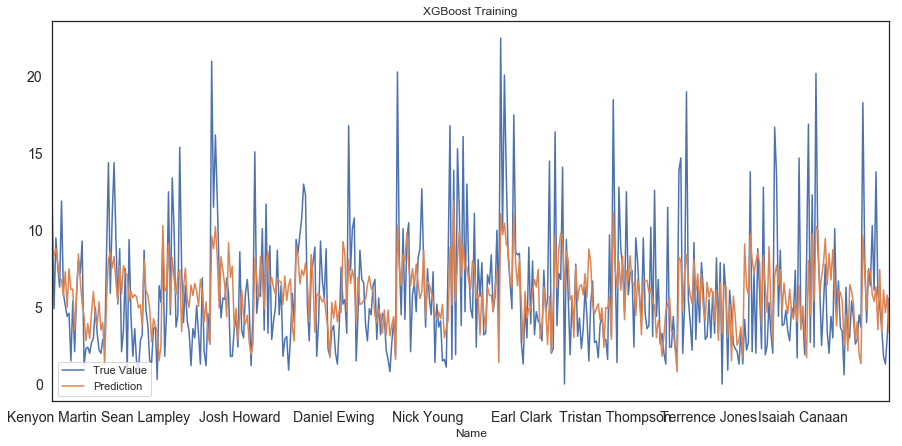

adj train r^2 = 0.30611997320655704
train mse = 10.737130439630247


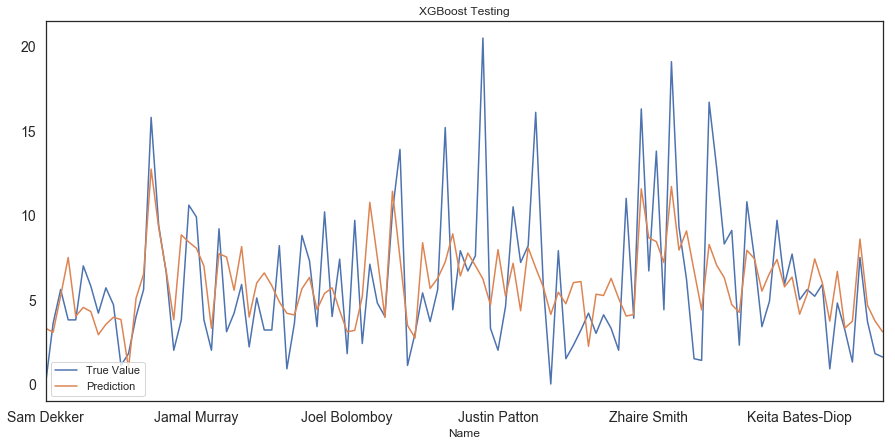

adj test r^2 = 0.2907870657663919
test mse = 11.418480767050672


In [575]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

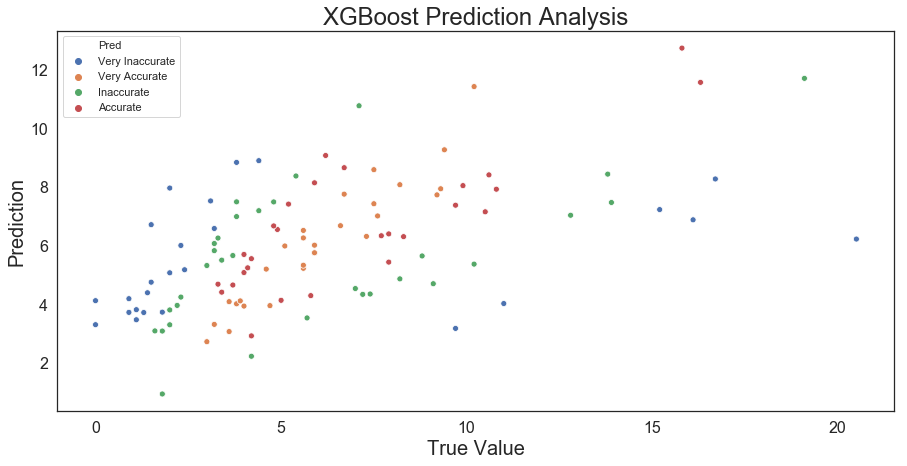

This model is able to relatively accurately predict 24.11% of NBA Rookies.
This model is able to very accurately predict 25.0% of NBA Rookies.


In [576]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("XGBoost Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

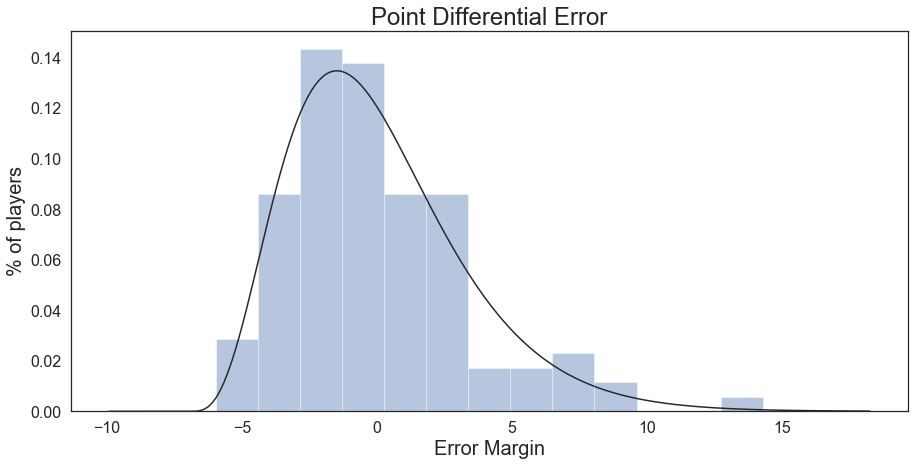

This model is able to relatively accurately predict 49.11% of NBA Rookies within 2 points.


In [577]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

## Feed Forward Neural Network

In [578]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [579]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=30, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
out = model.fit(train_x.values, train_y.NBAPTS.values, validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])

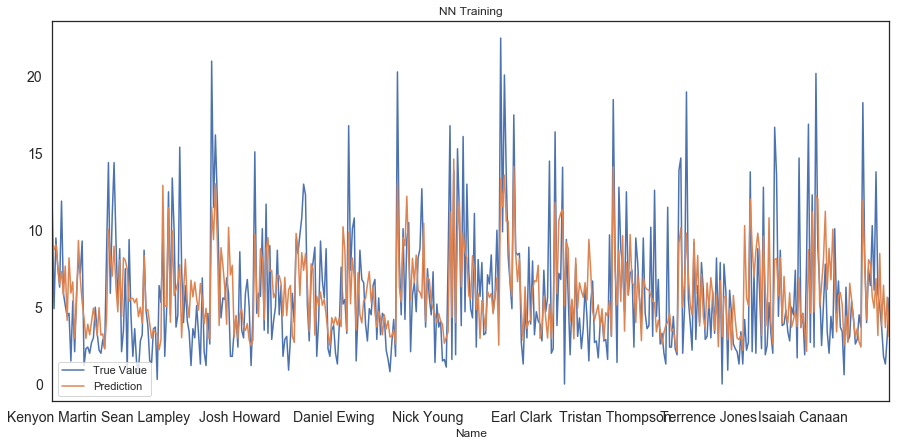

adj train r^2 = 0.40310687828468905
train mse = 9.236350750708697


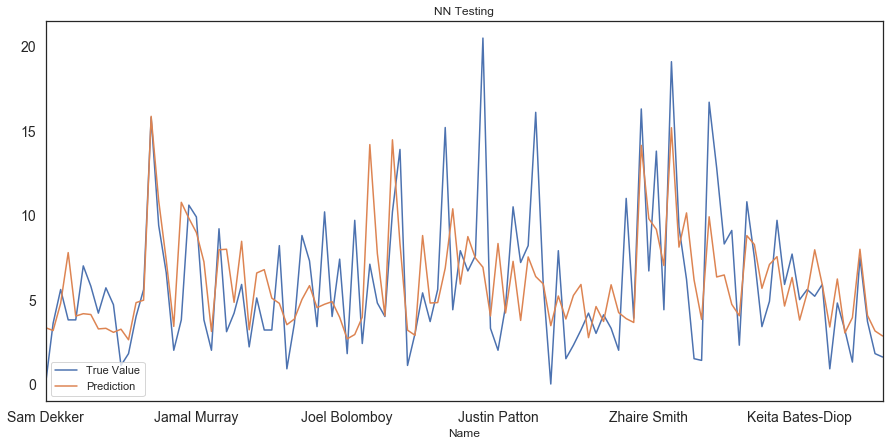

adj test r^2 = 0.30204490772515835
test mse = 11.237227090362468


In [580]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

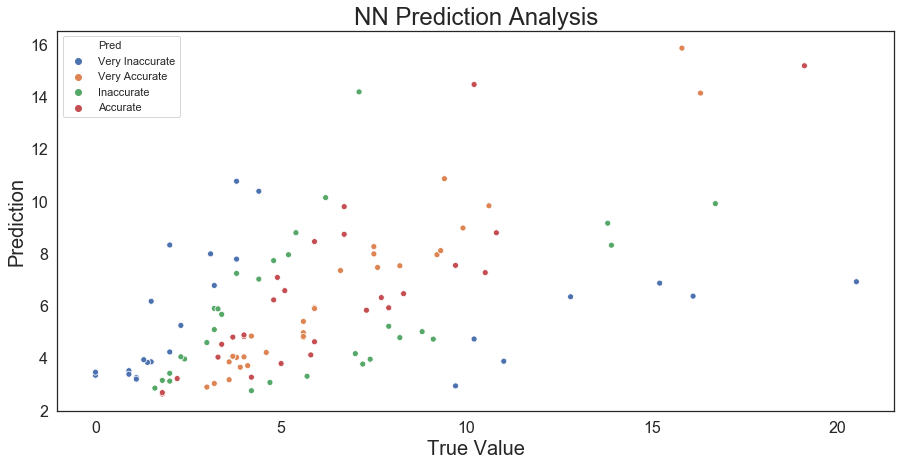

This model is able to relatively accurately predict 24.11% of NBA Rookies.
This model is able to very accurately predict 25.89% of NBA Rookies.


In [581]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("NN Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

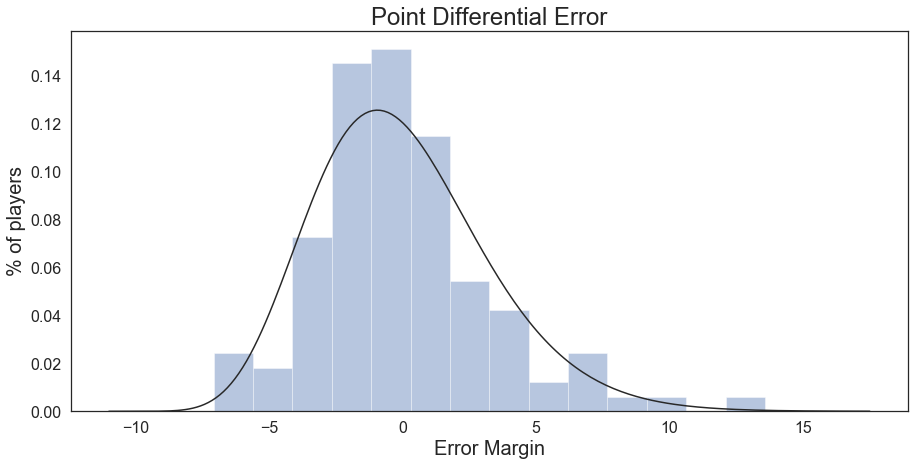

This model is able to relatively accurately predict 50.0% of NBA Rookies within 2 points.


In [582]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

## LSTM

In [583]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [584]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(1, train_x.values.shape[1]), recurrent_activation='tanh', recurrent_regularizer=regularizers.l2(0.32), activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50, activation='tanh'))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.NBAPTS.values.ravel(), validation_data=[X_tst_t, test_y['NBAPTS'].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])

Restoring model weights from the end of the best epoch
Epoch 00113: early stopping


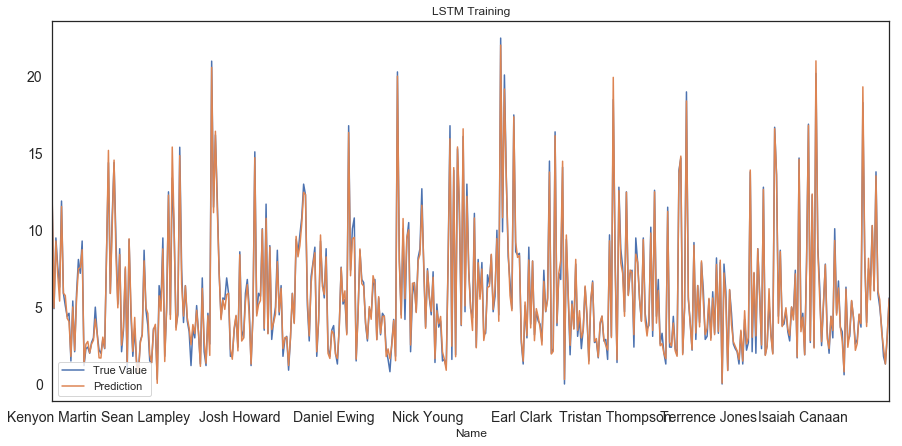

adj train r^2 = 0.9883928689849384
train mse = 0.17960926230219093


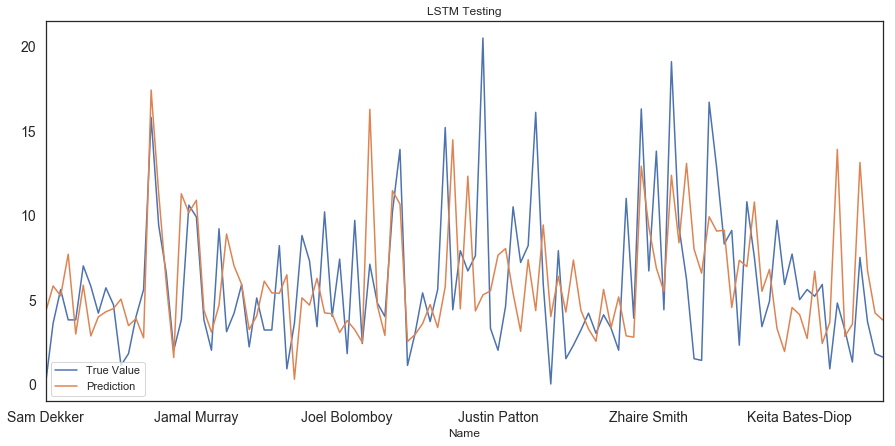

adj test r^2 = -0.09189206947619044
test mse = 17.57969714481022


In [585]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

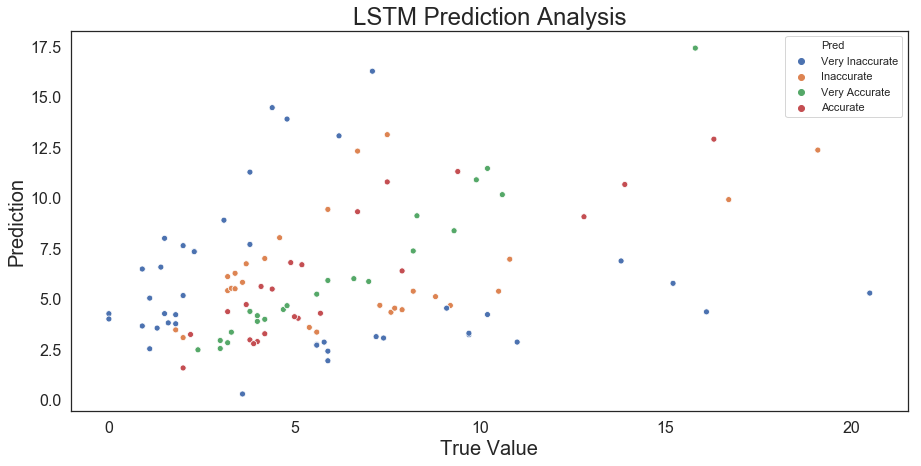

This model is able to relatively accurately predict 19.64% of NBA Rookies.
This model is able to very accurately predict 19.64% of NBA Rookies.


In [586]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("LSTM Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

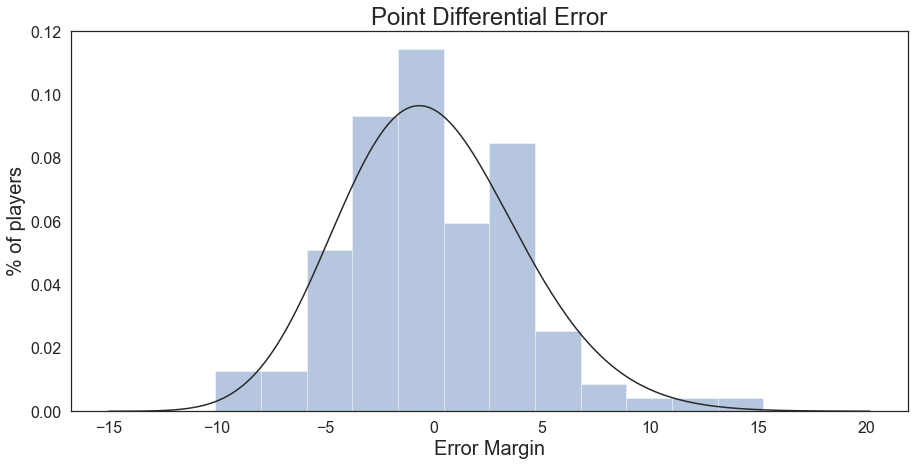

This model is able to relatively accurately predict 39.29% of NBA Rookies within 2 points.


In [587]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

## TPOT

In [464]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=10, max_time_mins=10, verbosity=1)
tpot.fit(train_x.values, train_y.NBAPTS.values.ravel())


10.006673583333333 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: AdaBoostRegressor(input_matrix, learning_rate=0.1, loss=exponential, n_estimators=100)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=10, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

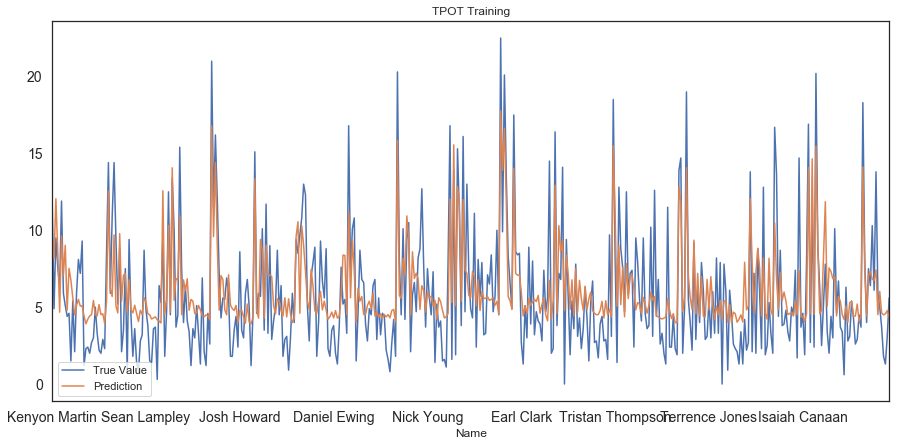

adj train r^2 = 0.5681577756282696
train mse = 6.682345813939426


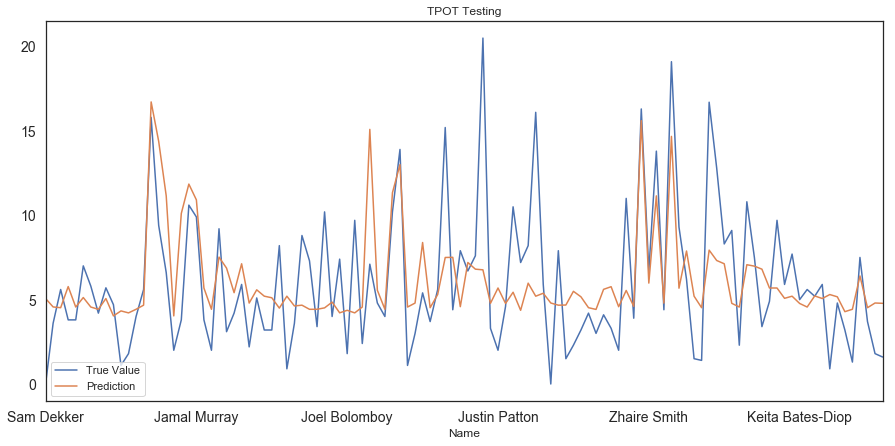

adj test r^2 = 0.2912372509561888
test mse = 11.411232688676494


In [588]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

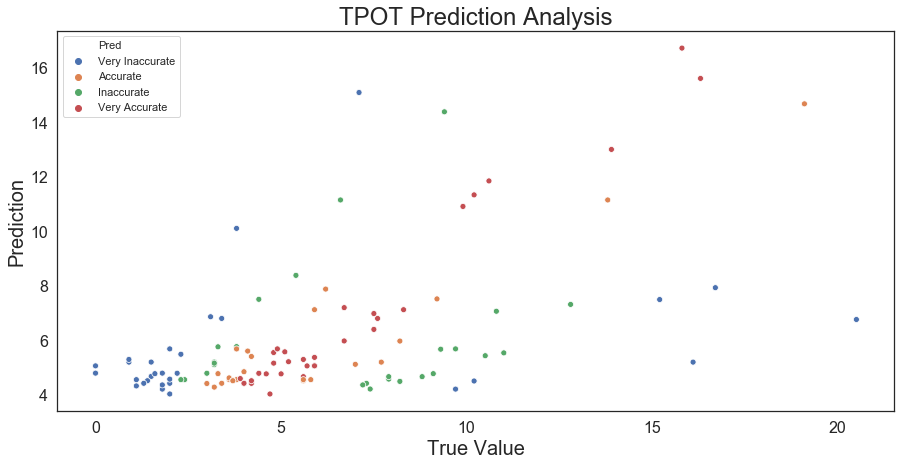

This model is able to relatively accurately predict 21.43% of NBA Rookies.
This model is able to very accurately predict 28.57% of NBA Rookies.


In [589]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("TPOT Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

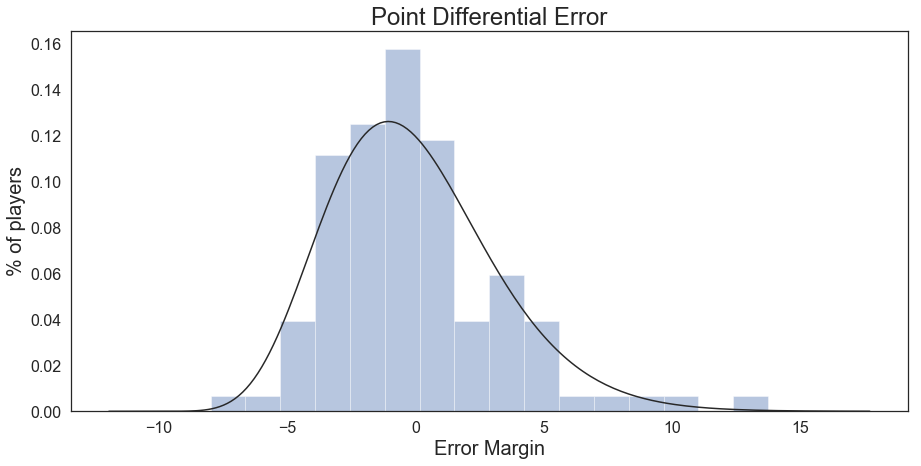

This model is able to relatively accurately predict 50.0% of NBA Rookies within 2 points.


In [590]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

## Differences

In [591]:
test_y2['chip'] = abs(test_y2['NBAPTS'] - test_y2['prediction'])
test_y2.sort_values('chip', ascending=True).head()

NBATRB    NBAAST    NBASTL    NBABLK  NBAPTS  \
Name                                                                 
Chandler Hutchison  0.949602 -0.303523  0.037580 -0.521142     5.2   
Jordan Bell         0.633010  0.418247  0.294725  2.281977     4.6   
Keita Bates-Diop    0.210888 -0.447877  0.294725  0.724689     5.0   
Tyus Jones         -0.580592  1.212195  0.809016 -0.521142     4.2   
Ivan Rabb           1.055133 -0.231346 -0.476712  0.413231     5.6   

                    prediction           Pred      chip  
Name                                                     
Chandler Hutchison    5.218462  Very Accurate  0.018462  
Jordan Bell           4.773626  Very Accurate  0.173626  
Keita Bates-Diop      4.773626  Very Accurate  0.226374  
Tyus Jones            4.426496  Very Accurate  0.226496  
Ivan Rabb             5.301608  Very Accurate  0.298392

In [592]:
test_y2['chip'] = abs(test_y2['NBAPTS'] - test_y2['prediction'])
test_y2.sort_values('chip', ascending=False).head()

NBATRB    NBAAST    NBASTL    NBABLK  NBAPTS  prediction  \
Name                                                                           
Donovan Mitchell  0.685776  1.789611  2.609035  0.101773    20.5    6.766667   
Kyle Kuzma        2.057674  0.418247  0.294725  0.413231    16.1    5.203670   
Collin Sexton     0.263653  1.284372  0.037580 -0.521142    16.7    7.933028   
Markelle Fultz    0.369184  1.861788  1.066162  0.101773     7.1   15.088889   
Lauri Markkanen   2.690858 -0.014815  0.294725  1.036146    15.2    7.498077   

                             Pred       chip  
Name                                          
Donovan Mitchell  Very Inaccurate  13.733333  
Kyle Kuzma        Very Inaccurate  10.896330  
Collin Sexton     Very Inaccurate   8.766972  
Markelle Fultz    Very Inaccurate   7.988889  
Lauri Markkanen   Very Inaccurate   7.701923

## 2019 Predictions

In [593]:
train=df3
test=df4
trains = np.split(train, [37], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [37], axis=1)
test_x=tests[0]
test_y=tests[1]

In [594]:
test_y.head()

NBATRB    NBAAST    NBASTL    NBABLK    NBAPTS
Name                                                                      
Zion Williamson          -1.266541 -0.880939 -1.248148 -0.832599 -1.280125
Jaxson Hayes             -1.266541 -0.880939 -1.248148 -0.832599 -1.280125
Nickeil Alexander-Walker -1.266541 -0.880939 -1.248148 -0.832599 -1.280125
RJ Barrett               -1.266541 -0.880939 -1.248148 -0.832599 -1.280125
Ignas Brazdeikis         -1.266541 -0.880939 -1.248148 -0.832599 -1.280125

In [474]:
from sklearn.feature_selection import RFE
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    model = LinearRegression()
    rfe = RFE(model, 30)
    reg = rfe.fit(train_x.values, train_y[col].values)
    cols = []
    co = df3.columns
    for colo in co:
        cols = cols + [colo]
    picks = []
    for x in range(0,37):
        if reg.support_[x]:
            picks.append(cols[x])
    train_x3 = train_x[picks]
    test_x3 = test_x[picks]
    K.clear_session()
    model = Sequential()
    model.add(Dense(128, input_dim=30, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
    model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
    model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
    out = model.fit(train_x3.values, train_y[col].values.ravel(), validation_data=[test_x3.values, test_y[col].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3.values))

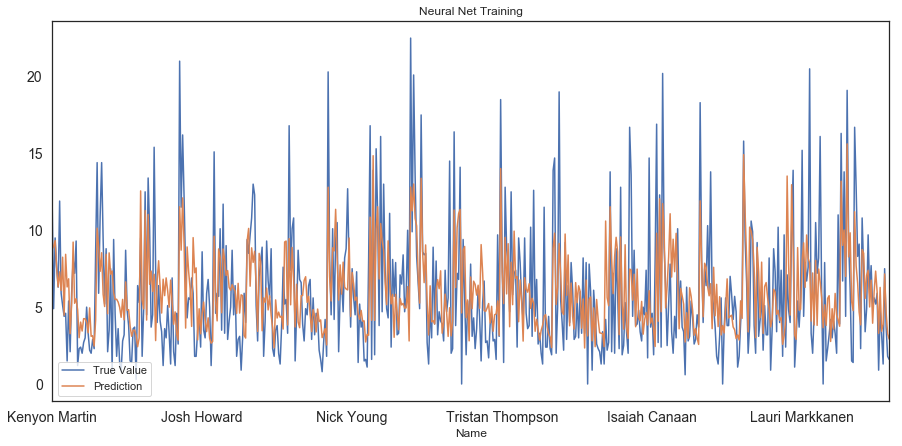

adj train r^2 = 0.39667494925337166
train mse = 9.422702502966724


In [475]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x3.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

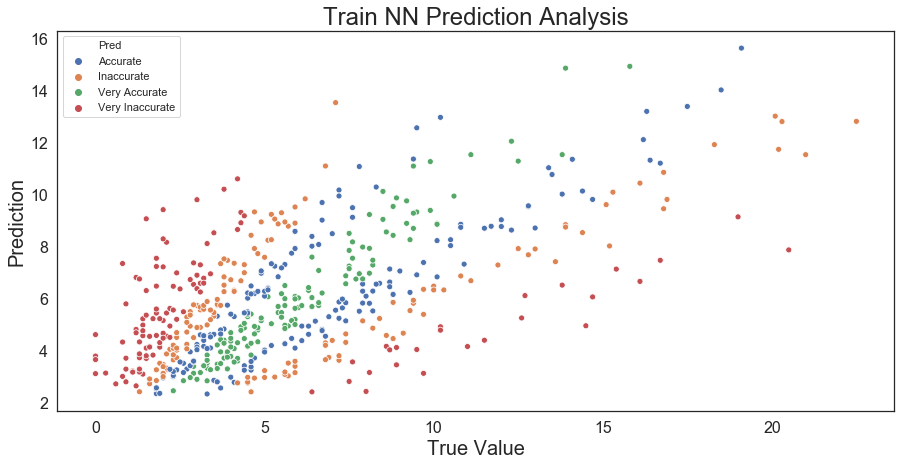

This model is able to relatively accurately predict 28.44% of NBA Rookies.
This model is able to very accurately predict 24.15% of NBA Rookies.


In [476]:
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=train_y2)
ax.set_title("Train NN Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Very Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")

## Results

In [477]:
test_y2 = test_y2.loc[~test_y2.index.duplicated(keep='first')]

In [478]:
test_y2['Value'] = 1*test_y2['NBAPTS'] + 1.2*test_y2['NBATRB'] + 1.5*test_y2['NBAAST'] + 3*test_y2['NBASTL'] + 3*test_y2['NBABLK']
test_y2.sort_values('Value', ascending=False)

NBATRB    NBAAST    NBASTL    NBABLK     NBAPTS  \
Name                                                                          
Zion Williamson           6.612418  1.892000  1.233226  0.666907  14.498786   
Ja Morant                 4.102297  5.708556  0.931118  0.333360  11.655253   
RJ Barrett                4.258074  3.508782  0.735167  0.275962  14.915888   
Darius Garland            3.306299  4.228993  0.808569  0.272363  12.810377   
Coby White                3.096685  4.056083  0.836349  0.269391  12.818074   
Jaxson Hayes              5.583194  0.956054  0.764572  0.965909  10.264873   
Rui Hachimura             4.979609  1.693853  0.692376  0.410962  11.048509   
Brandon Clarke            5.784056  1.046957  0.763146  1.010400   9.039463   
Cameron Johnson           4.789554  2.046453  0.797491  0.465369   9.304208   
Jarrett Culver            3.420826  1.996981  0.801557  0.345560  10.409810   
DeAndre Hunter            3.928618  1.626514  0.649170  0.348984  10.284121   
Dylan Windler             3.807676  2.436669  0.775145  0.412160   8.227747   
Daniel Gafford            4.961619  0.740209  0.526682  0.801253   7.651245   
PJ Washington             4.056074  0.939279  0.536346  0.492775   7.462543   
Chuma Okeke               3.445002  0.985718  0.783941  0.420440   6.393384   
Bruno Fernando            4.301780  0.805305  0.405015  0.675636   6.003942   
Nickeil Alexander-Walker  2.314303  1.604086  0.703492  0.222062   7.448298   
Cam Reddish               2.015774  1.192816  0.698714  0.284780   8.204188   
Kevin PorterJr            2.392404  1.752788  0.580407  0.281286   6.897761   
Romeo Langford            2.359235  1.092067  0.444289  0.323364   7.439448   
Grant Williams            3.307384  0.613556  0.451925  0.540943   6.305540   
Tyler Herro               2.244236  1.255809  0.566955  0.160239   7.142994   
Cody Martin               2.510035  1.726104  0.667704  0.364716   5.090898   
Ty Jerome                 1.669979  2.067182  0.660930  0.089012   5.310156   
Mfiondu Kabengele         3.021458  0.448402  0.357070  0.473454   5.574347   
Nassir Little             2.609997  0.721436  0.443483  0.226290   6.066550   
Jaylen Nowell             1.709018  1.997599  0.520070  0.081211   5.324497   
Matisse Thybulle          1.657724  0.807727  1.016544  0.413449   4.354128   
Carsen Edwards            1.419475  1.410587  0.438802  0.077879   6.128786   
Nicolas Claxton           2.858548  0.432458  0.344677  0.632015   4.194699   
Tremont Waters            1.274406  2.027244  0.798750  0.007936   4.193044   
Ignas Brazdeikis          2.384078  0.658559  0.354986  0.172625   5.628648   
Bol Bol                   2.780051  0.238901  0.222654  0.673919   4.626904   
Isaiah Roby               2.320405  0.657723  0.472362  0.457833   4.095800   
Keldon Johnson            1.979002  0.851685  0.400561  0.155535   5.230999   
Jalen McDaniels           2.853525  0.679470  0.427904  0.190797   4.160089   
Jordan Poole              1.472799  1.313237  0.462689  0.119401   4.865624   
Talen Horton-Tucker       1.605418  0.802907  0.477440  0.197105   4.301407   
Terance Mann              1.975913  0.895991  0.421580  0.150848   3.967937   
Justin James              1.733376  0.794692  0.388412  0.244678   3.503723   
Quinndary Weatherspoon    1.490670  0.758289  0.462494  0.092627   4.045285   
Jaylen Hands              1.175315  1.700363  0.364492  0.024372   3.450467   
Jordan Bone               1.137545  1.794263  0.315827 -0.001963   3.541558   
Admiral Schofield         1.680799  0.532412  0.342138  0.119150   3.962353   
Justin Wright-Foreman     1.032643  1.293302  0.242096 -0.025072   4.256767   
Eric Paschall             1.777320  0.461358  0.248216  0.164694   3.293625   
Kyle Guy                  1.115496  1.039194  0.232934  0.000701   3.475358   
Jarrell Brantley          1.836745  0.315734  0.272569  0.129749   3.046449   
Marial Shayok             0.954907  0.576671  0.245299 -0.027712   3.816606   

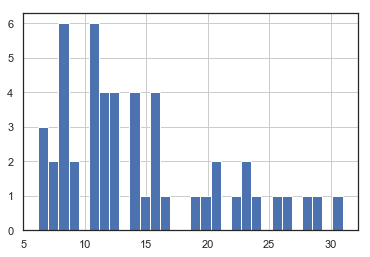

Value Distribution in Draft


In [479]:
hist = test_y2['Value'].hist(bins=30)
plt.show()
print('Value Distribution in Draft')
## This is the result of Neural Networks

In [480]:
test_y2['NBAPTS'].mean()

6.573587417602539

In [481]:
test_y2 = test_y2.round(2)
test_y2 = test_y2.sort_index(axis = 0) 
test_y2.head()

NBATRB  NBAAST  NBASTL  NBABLK  NBAPTS      Value
Name                                                                
Admiral Schofield    1.68    0.53    0.34    0.12    3.96   8.160000
Bol Bol              2.78    0.24    0.22    0.67    4.63  11.010000
Brandon Clarke       5.78    1.05    0.76    1.01    9.04  22.870001
Bruno Fernando       4.30    0.81    0.41    0.68    6.00  15.620000
Cam Reddish          2.02    1.19    0.70    0.28    8.20  15.360000

In [482]:
dfn = pd.read_csv('CollegeRookieStatLog5.csv')
dfn = dfn[['Name','Pos']]
finaly = test_y2.merge(dfn, left_on='Name', right_on='Name')
finaly.head()

Name  NBATRB  NBAAST  NBASTL  NBABLK  NBAPTS      Value Pos
0  Admiral Schofield    1.68    0.53    0.34    0.12    3.96   8.160000  SF
1            Bol Bol    2.78    0.24    0.22    0.67    4.63  11.010000   C
2     Brandon Clarke    5.78    1.05    0.76    1.01    9.04  22.870001  PF
3     Bruno Fernando    4.30    0.81    0.41    0.68    6.00  15.620000   C
4        Cam Reddish    2.02    1.19    0.70    0.28    8.20  15.360000  SG

In [483]:
finaly.to_csv('NewRookiePredictions5.csv')

## Draft Night vs Results

In [484]:
college2 = pd.read_csv('2019DraftResults.csv')
dfo = pd.read_csv('NewRookiePredictions5.csv')

In [485]:
college2 = college2.drop(['Unnamed: 0'], axis=1)
dfo = dfo.drop(['Unnamed: 0'], axis=1)
dfo = dfo.sort_values('Value', ascending=False)
dfo = dfo.reset_index()
dfo = dfo.drop(['index'], axis=1)
college2 = college2.rename(index=str, columns={"emp": "Name"})

In [486]:
from IPython.display import display_html 
df1_styler = college2[college2['pos']=='PG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Point Guards:')
df2_styler = dfo[dfo['Pos']=='PG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Point Guards:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

Draft Results Point Guards: Name height weight pos col age 
 
 1 
 Ja Morant 
 6-3 
 175 
 PG 
 Murray St. 
 19 
 
 
 4 
 Darius Garland 
 6-2 
 175 
 PG 
 Vanderbilt 
 19 
 
 
 6 
 Coby White 
 6-5 
 190 
 PG 
 North Carolina 
 19 
 
 
 23 
 Ty Jerome 
 6-5 
 195 
 PG 
 Virginia 
 21 
 
 
 27 
 Jordan Poole 
 6-5 
 190 
 PG 
 Michigan 
 20 
 
 
 32 
 Carsen Edwards 
 6-0 
 200 
 PG 
 Purdue 
 21 
 
 
 42 
 Jaylen Nowell 
 6-4 
 200 
 PG 
 Washington 
 19 
 
 
 50 
 Tremont Waters 
 5-11 
 175 
 PG 
 LSU 
 21 
 
 
 52 
 Justin Wright-Foreman 
 6-2 
 190 
 PG 
 Hofstra 
 21 
 
 
 54 
 Kyle Guy 
 6-2 
 170 
 PG 
 Virginia 
 21 
 
 
 55 
 Jaylen Hands 
 6-3 
 180 
 PG 
 UCLA 
 20 
 
 
 56 
 Jordan Bone 
 6-3 
 180 
 PG 
 Tennessee 
 21 
 
 Power Ranking Point Guards: Name NBATRB NBAAST NBASTL NBABLK NBAPTS Value Pos 
 
 1 
 Ja Morant 
 4.1 
 5.71 
 0.93 
 0.33 
 11.66 
 28.93 
 PG 
 
 
 3 
 Darius Garland 
 3.31 
 4.23 
 0.81 
 0.27 
 12.81 
 26.36 
 PG 
 
 
 4 
 Coby White 
 3.1 
 4.06 
 0.84 
 0.27 
 12.82 
 25.94 
 PG 
 
 
 23 
 Ty Jerome 
 1.67 
 2.07 
 0.66 
 0.09 
 5.31 
 12.66 
 PG 
 
 
 26 
 Jaylen Nowell 
 1.71 
 2 
 0.52 
 0.08 
 5.32 
 12.18 
 PG 
 
 
 28 
 Carsen Edwards 
 1.42 
 1.41 
 0.44 
 0.08 
 6.13 
 11.5 
 PG 
 
 
 30 
 Tremont Waters 
 1.27 
 2.03 
 0.8 
 0.01 
 4.19 
 11.18 
 PG 
 
 
 36 
 Jordan Poole 
 1.47 
 1.31 
 0.46 
 0.12 
 4.87 
 10.35 
 PG 
 
 
 41 
 Jaylen Hands 
 1.18 
 1.7 
 0.36 
 0.02 
 3.45 
 8.58 
 PG 
 
 
 42 
 Jordan Bone 
 1.14 
 1.79 
 0.32 
 -0 
 3.54 
 8.54 
 PG 
 
 
 44 
 Justin Wright-Foreman 
 1.03 
 1.29 
 0.24 
 -0.03 
 4.26 
 8.09 
 PG 
 
 
 46 
 Kyle Guy 
 1.12 
 1.04 
 0.23 
 0 
 3.48 
 7.07 
 PG

In [487]:
df1_styler = college2[college2['pos']=='SG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Shooting Guards:')
df2_styler = dfo[dfo['Pos']=='SG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Shooting Guards:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

Draft Results Shooting Guards: Name height weight pos col age 
 
 2 
 RJ Barrett 
 6-7 
 210 
 SG 
 Duke 
 19 
 
 
 5 
 Jarrett Culver 
 6-6 
 195 
 SG 
 Texas Tech 
 20 
 
 
 9 
 Cameron Reddish 
 6-8 
 210 
 SG 
 Duke 
 19 
 
 
 12 
 Tyler Herro 
 6-6 
 195 
 SG 
 Kentucky 
 19 
 
 
 13 
 Romeo Langford 
 6-6 
 210 
 SG 
 Indiana 
 19 
 
 
 16 
 Nickeil Alexander-Walker 
 6-5 
 205 
 SG 
 Virginia Tech 
 20 
 
 
 19 
 Matisse Thybulle 
 6-6 
 200 
 SG 
 Washington 
 22 
 
 
 25 
 Dylan Windler 
 6-7 
 195 
 SG 
 Belmont 
 22 
 
 
 28 
 Keldon Johnson 
 6-6 
 215 
 SG 
 Kentucky 
 19 
 
 
 29 
 Kevin Porter 
 6-5 
 215 
 SG 
 USC 
 19 
 
 
 31 
 KZ Okpala 
 6-8 
 210 
 SG 
 Stanford 
 20 
 
 
 34 
 Marcos Louzada Silva 
 6-5 
 190 
 SG 
 Brazil 
 19 
 
 
 35 
 Cody Martin 
 6-6 
 190 
 SG 
 Nevada 
 23 
 
 
 39 
 Justin James 
 6-7 
 180 
 SG 
 Wyoming 
 22 
 
 
 45 
 Talen Horton-Tucker 
 6-4 
 235 
 SG 
 Iowa St. 
 18 
 
 
 47 
 Terance Mann 
 6-6 
 205 
 SG 
 Florida St. 
 22 
 
 
 48 
 Quinndary Weatherspoon 
 6-4 
 205 
 SG 
 Mississippi St. 
 22 
 
 
 53 
 Marial Shayok 
 6-6 
 195 
 SG 
 Iowa St. 
 23 
 
 
 57 
 Miye Oni 
 6-5 
 205 
 SG 
 Yale 
 21 
 
 
 59 
 Vanja Marinkovic 
 6-7 
 195 
 SG 
 Serbia 
 22 
 
 Power Ranking Shooting Guards: Name NBATRB NBAAST NBASTL NBABLK NBAPTS Value Pos 
 
 2 
 RJ Barrett 
 4.26 
 3.51 
 0.74 
 0.28 
 14.92 
 28.32 
 SG 
 
 
 9 
 Jarrett Culver 
 3.42 
 2 
 0.8 
 0.35 
 10.41 
 20.95 
 SG 
 
 
 11 
 Dylan Windler 
 3.81 
 2.44 
 0.78 
 0.41 
 8.23 
 20.01 
 SG 
 
 
 16 
 Nickeil Alexander-Walker 
 2.31 
 1.6 
 0.7 
 0.22 
 7.45 
 15.41 
 SG 
 
 
 17 
 Cam Reddish 
 2.02 
 1.19 
 0.7 
 0.28 
 8.2 
 15.36 
 SG 
 
 
 18 
 Kevin PorterJr 
 2.39 
 1.75 
 0.58 
 0.28 
 6.9 
 14.98 
 SG 
 
 
 19 
 Romeo Langford 
 2.36 
 1.09 
 0.44 
 0.32 
 7.44 
 14.21 
 SG 
 
 
 21 
 Tyler Herro 
 2.24 
 1.26 
 0.57 
 0.16 
 7.14 
 13.9 
 SG 
 
 
 22 
 Cody Martin 
 2.51 
 1.73 
 0.67 
 0.36 
 5.09 
 13.79 
 SG 
 
 
 27 
 Matisse Thybulle 
 1.66 
 0.81 
 1.02 
 0.41 
 4.35 
 11.84 
 SG 
 
 
 34 
 Keldon Johnson 
 1.98 
 0.85 
 0.4 
 0.16 
 5.23 
 10.55 
 SG 
 
 
 37 
 Talen Horton-Tucker 
 1.61 
 0.8 
 0.48 
 0.2 
 4.3 
 9.46 
 SG 
 
 
 38 
 Terance Mann 
 1.98 
 0.9 
 0.42 
 0.15 
 3.97 
 9.4 
 SG 
 
 
 39 
 Justin James 
 1.73 
 0.79 
 0.39 
 0.24 
 3.5 
 8.68 
 SG 
 
 
 40 
 Quinndary Weatherspoon 
 1.49 
 0.76 
 0.46 
 0.09 
 4.05 
 8.64 
 SG 
 
 
 48 
 Marial Shayok 
 0.95 
 0.58 
 0.25 
 -0.03 
 3.82 
 6.48 
 SG 
 
 
 49 
 Miye Oni 
 0.98 
 0.66 
 0.22 
 0.14 
 2.95 
 6.2 
 SG

In [488]:
df1_styler = college2[college2['pos']=='SF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Small Forwards:')
df2_styler = dfo[dfo['Pos']=='SF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Small Forwards:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

Draft Results Small Forwards: Name height weight pos col age 
 
 3 
 DeAndre Hunter 
 6-7 
 225 
 SF 
 Virginia 
 21 
 
 
 8 
 Rui Hachimura 
 6-8 
 235 
 SF 
 Gonzaga 
 21 
 
 
 10 
 Cameron Johnson 
 6-8 
 205 
 SF 
 North Carolina 
 23 
 
 
 14 
 Sekou Doumbouya 
 6-9 
 230 
 SF 
 France 
 18 
 
 
 15 
 Chuma Okeke 
 6-8 
 235 
 SF 
 Auburn 
 20 
 
 
 22 
 Darius Bazley 
 6-9 
 210 
 SF 
 USA 
 19 
 
 
 24 
 Nassir Little 
 6-6 
 225 
 SF 
 North Carolina 
 19 
 
 
 36 
 Deividas Sirvydis 
 6-8 
 195 
 SF 
 Lithuania 
 19 
 
 
 41 
 Admiral Schofield 
 6-5 
 240 
 SF 
 Tennessee 
 22 
 
 
 44 
 Isaiah Roby 
 6-8 
 215 
 SF 
 Nebraska 
 21 
 
 
 46 
 Ignas Brazdeikis 
 6-7 
 220 
 SF 
 Michigan 
 20 
 
 
 51 
 Jalen McDaniels 
 6-9 
 190 
 SF 
 San Diego St. 
 21 
 
 Power Ranking Small Forwards: Name NBATRB NBAAST NBASTL NBABLK NBAPTS Value Pos 
 
 6 
 Rui Hachimura 
 4.98 
 1.69 
 0.69 
 0.41 
 11.05 
 22.87 
 SF 
 
 
 8 
 Cameron Johnson 
 4.79 
 2.05 
 0.8 
 0.47 
 9.3 
 21.91 
 SF 
 
 
 10 
 DeAndre Hunter 
 3.93 
 1.63 
 0.65 
 0.35 
 10.28 
 20.43 
 SF 
 
 
 14 
 Chuma Okeke 
 3.45 
 0.99 
 0.78 
 0.42 
 6.39 
 15.62 
 SF 
 
 
 25 
 Nassir Little 
 2.61 
 0.72 
 0.44 
 0.23 
 6.07 
 12.29 
 SF 
 
 
 31 
 Ignas Brazdeikis 
 2.38 
 0.66 
 0.35 
 0.17 
 5.63 
 11.06 
 SF 
 
 
 33 
 Isaiah Roby 
 2.32 
 0.66 
 0.47 
 0.46 
 4.1 
 10.66 
 SF 
 
 
 35 
 Jalen McDaniels 
 2.85 
 0.68 
 0.43 
 0.19 
 4.16 
 10.46 
 SF 
 
 
 43 
 Admiral Schofield 
 1.68 
 0.53 
 0.34 
 0.12 
 3.96 
 8.16 
 SF

In [489]:
df1_styler = college2[college2['pos']=='PF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Power Forwards:')
df2_styler = dfo[dfo['Pos']=='PF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Power Forwards:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

Draft Results Power Forwards: Name height weight pos col age 
 
 0 
 Zion Williamson 
 6-6 
 280 
 PF 
 Duke 
 18 
 
 
 7 
 Jaxson Hayes 
 6-11 
 220 
 PF 
 Texas 
 19 
 
 
 11 
 PJ Washington 
 6-8 
 230 
 PF 
 Kentucky 
 20 
 
 
 18 
 Luka Samanic 
 6-11 
 230 
 PF 
 Croatia 
 19 
 
 
 20 
 Brandon Clarke 
 6-8 
 210 
 PF 
 Gonzaga 
 22 
 
 
 21 
 Grant Williams 
 6-7 
 240 
 PF 
 Tennessee 
 20 
 
 
 26 
 Mfiondu Kabengele 
 6-10 
 255 
 PF 
 Florida St. 
 21 
 
 
 30 
 Nicolas Claxton 
 6-11 
 215 
 PF 
 Georgia 
 20 
 
 
 37 
 Daniel Gafford 
 6-10 
 240 
 PF 
 Arkansas 
 20 
 
 
 38 
 Alen Smailagic 
 6-10 
 215 
 PF 
 Serbia 
 18 
 
 
 40 
 Eric Paschall 
 6-7 
 255 
 PF 
 Villanova 
 22 
 
 
 49 
 Jarrell Brantley 
 6-7 
 255 
 PF 
 Charleston 
 23 
 
 Power Ranking Power Forwards: Name NBATRB NBAAST NBASTL NBABLK NBAPTS Value Pos 
 
 0 
 Zion Williamson 
 6.61 
 1.89 
 1.23 
 0.67 
 14.5 
 30.97 
 PF 
 
 
 5 
 Jaxson Hayes 
 5.58 
 0.96 
 0.76 
 0.97 
 10.26 
 23.59 
 PF 
 
 
 7 
 Brandon Clarke 
 5.78 
 1.05 
 0.76 
 1.01 
 9.04 
 22.87 
 PF 
 
 
 12 
 Daniel Gafford 
 4.96 
 0.74 
 0.53 
 0.8 
 7.65 
 18.7 
 PF 
 
 
 13 
 PJ Washington 
 4.06 
 0.94 
 0.54 
 0.49 
 7.46 
 16.83 
 PF 
 
 
 20 
 Grant Williams 
 3.31 
 0.61 
 0.45 
 0.54 
 6.31 
 14.17 
 PF 
 
 
 24 
 Mfiondu Kabengele 
 3.02 
 0.45 
 0.36 
 0.47 
 5.57 
 12.36 
 PF 
 
 
 29 
 Nicolas Claxton 
 2.86 
 0.43 
 0.34 
 0.63 
 4.19 
 11.2 
 PF 
 
 
 45 
 Eric Paschall 
 1.78 
 0.46 
 0.25 
 0.16 
 3.29 
 7.36 
 PF 
 
 
 47 
 Jarrell Brantley 
 1.84 
 0.32 
 0.27 
 0.13 
 3.05 
 6.93 
 PF

In [490]:
df1_styler = college2[college2['pos']=='C'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Centers:')
df2_styler = dfo[dfo['Pos']=='C'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Centers:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

Draft Results Centers: Name height weight pos col age 
 
 17 
 Goga Bitadze 
 6-11 
 250 
 C 
 Rep. of Georgia 
 19 
 
 
 33 
 Bruno Fernando 
 6-10 
 240 
 C 
 Maryland 
 20 
 
 
 43 
 Bol Bol 
 7-2 
 210 
 C 
 Oregon 
 19 
 
 
 58 
 Dewan Hernandez 
 6-10 
 235 
 C 
 Miami 
 22 
 
 Power Ranking Centers: Name NBATRB NBAAST NBASTL NBABLK NBAPTS Value Pos 
 
 15 
 Bruno Fernando 
 4.3 
 0.81 
 0.41 
 0.68 
 6 
 15.62 
 C 
 
 
 32 
 Bol Bol 
 2.78 
 0.24 
 0.22 
 0.67 
 4.63 
 11.01 
 C

## Added Value

In [491]:
dfm = pd.read_csv('fixlater2.csv')
dfm = dfm[['Name','Pk','Tm']]
finaly = dfo.merge(dfm, left_on='Name', right_on='Name')
finaly.Tm = finaly.Tm.str[:-4]
finaly = finaly.sort_values('Pk', ascending=True)
finaly.head()

Name  NBATRB  NBAAST  NBASTL  NBABLK  NBAPTS  Value Pos  Pk  \
0   Zion Williamson    6.61    1.89    1.23    0.67   14.50  30.97  PF   1   
1         Ja Morant    4.10    5.71    0.93    0.33   11.66  28.93  PG   2   
2        RJ Barrett    4.26    3.51    0.74    0.28   14.92  28.32  SG   3   
10   DeAndre Hunter    3.93    1.63    0.65    0.35   10.28  20.43  SF   4   
3    Darius Garland    3.31    4.23    0.81    0.27   12.81  26.36  PG   5   

           Tm  
0    Pelicans  
1   Grizzlies  
2      Knicks  
10      Hawks  
3   Cavaliers

In [492]:
finaly['diff'] = finaly.sort_values('Pk', ascending=True)['Value'].values - finaly.sort_values('Value', ascending=False)['Value'].values

In [494]:
teams = finaly.Tm.unique()
av = []
for t in teams:
    av.append(t)
    finaly2 = finaly[finaly['Tm']==t]
    av.append(finaly2['NBAPTS'].sum())
    av.append(finaly2['NBAAST'].sum())
    av.append(finaly2['NBATRB'].sum())
    av.append(finaly2['NBASTL'].sum())
    av.append(finaly2['NBABLK'].sum())
    av.append(finaly2['Value'].sum())
    av.append(finaly2['diff'].sum())
    av.append(len(finaly2))
av2 = np.array(av)
refined = np.reshape(av2, (-1, 9))
teamdf = pd.DataFrame(refined, columns=['Team','Points','Assists','Rebounds','Steals','Blocks','Value','Grade','Num'])
cols=['Points','Assists','Rebounds','Steals','Blocks','Value','Grade','Num']
for col in cols:
    teamdf[col] = pd.to_numeric(teamdf[col], errors='coerce')

In [495]:
teamdf = teamdf.set_index('Team')
df1_styler = teamdf[['Points']].sort_values('Points', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Scoring:')
df2_styler = teamdf[['Assists']].sort_values('Assists', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Passing:')
df3_styler = teamdf[['Rebounds']].sort_values('Rebounds', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Rebounding:')
df4_styler = teamdf[['Steals']].sort_values('Steals', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Stealing:')
df5_styler = teamdf[['Blocks']].sort_values('Blocks', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Blocking:')
display_html(df1_styler._repr_html_()+' '+df2_styler._repr_html_()+' '+df3_styler._repr_html_()+' '+df4_styler._repr_html_()+' '+df5_styler._repr_html_(), raw=True)

Added Scoring: Points Team 
 
 Pelicans 
 32.21 
 
 
 Cavaliers 
 27.94 
 
 
 Hawks 
 24.48 
 
 
 Celtics 
 24.07 
 
 
 Grizzlies 
 20.7 
 
 
 Knicks 
 20.55 
 
 
 Bulls 
 20.47 
 
 
 76ers 
 17.44 
 
 
 Hornets 
 16.71 
 
 
 Timberwolves 
 15.73 
 
 
 Clippers 
 12.99 
 
 
 Wizards 
 11.05 
 
 
 Jazz 
 10.26 
 
 
 Suns 
 9.3 
 
 
 Spurs 
 9.28 
 
 
 Warriors 
 8.16 
 
 
 Heat 
 7.14 
 
 
 Kings 
 6.98 
 
 
 Magic 
 6.39 
 
 
 Trailblazers 
 6.07 
 
 
 Nuggets 
 4.63 
 
 
 Lakers 
 4.3 
 
 
 Nets 
 4.19 
 
 
 Mavericks 
 4.1 
 
 
 Pistons 
 3.54 
 
 Added Passing: Assists Team 
 
 Cavaliers 
 8.42 
 
 
 Grizzlies 
 6.76 
 
 
 Celtics 
 5.14 
 
 
 Bulls 
 4.8 
 
 
 Pelicans 
 4.45 
 
 
 Knicks 
 4.17 
 
 
 Timberwolves 
 4 
 
 
 76ers 
 3.99 
 
 
 Hawks 
 3.63 
 
 
 Hornets 
 3.35 
 
 
 Clippers 
 3.05 
 
 
 Jazz 
 2.27 
 
 
 Suns 
 2.05 
 
 
 Kings 
 1.83 
 
 
 Pistons 
 1.79 
 
 
 Warriors 
 1.77 
 
 
 Wizards 
 1.69 
 
 
 Spurs 
 1.61 
 
 
 Heat 
 1.26 
 
 
 Magic 
 0.99 
 
 
 Lakers 
 0.8 
 
 
 Trailblazers 
 0.72 
 
 
 Mavericks 
 0.66 
 
 
 Nets 
 0.43 
 
 
 Nuggets 
 0.24 
 
 Added Rebounding: Rebounds Team 
 
 Pelicans 
 14.5 
 
 
 Hawks 
 10.25 
 
 
 Grizzlies 
 9.88 
 
 
 Cavaliers 
 9.51 
 
 
 Hornets 
 9.42 
 
 
 Celtics 
 8.36 
 
 
 Bulls 
 8.06 
 
 
 Knicks 
 6.64 
 
 
 Clippers 
 6.18 
 
 
 76ers 
 5.96 
 
 
 Timberwolves 
 5.13 
 
 
 Wizards 
 4.98 
 
 
 Suns 
 4.79 
 
 
 Jazz 
 3.85 
 
 
 Spurs 
 3.47 
 
 
 Magic 
 3.45 
 
 
 Warriors 
 3.25 
 
 
 Nets 
 2.86 
 
 
 Kings 
 2.85 
 
 
 Nuggets 
 2.78 
 
 
 Trailblazers 
 2.61 
 
 
 Mavericks 
 2.32 
 
 
 Heat 
 2.24 
 
 
 Lakers 
 1.61 
 
 
 Pistons 
 1.14 
 
 Added Stealing: Steals Team 
 
 Pelicans 
 2.69 
 
 
 76ers 
 2.27 
 
 
 Cavaliers 
 2.17 
 
 
 Celtics 
 2.13 
 
 
 Hawks 
 1.76 
 
 
 Grizzlies 
 1.69 
 
 
 Hornets 
 1.64 
 
 
 Bulls 
 1.37 
 
 
 Timberwolves 
 1.32 
 
 
 Clippers 
 1.14 
 
 
 Knicks 
 1.09 
 
 
 Spurs 
 0.86 
 
 
 Suns 
 0.8 
 
 
 Magic 
 0.78 
 
 
 Jazz 
 0.73 
 
 
 Warriors 
 0.71 
 
 
 Wizards 
 0.69 
 
 
 Kings 
 0.62 
 
 
 Heat 
 0.57 
 
 
 Lakers 
 0.48 
 
 
 Mavericks 
 0.47 
 
 
 Trailblazers 
 0.44 
 
 
 Nets 
 0.34 
 
 
 Pistons 
 0.32 
 
 
 Nuggets 
 0.22 
 
 Added Blocking: Blocks Team 
 
 Pelicans 
 1.86 
 
 
 Grizzlies 
 1.34 
 
 
 Hawks 
 1.31 
 
 
 Bulls 
 1.07 
 
 
 Hornets 
 1.04 
 
 
 Cavaliers 
 0.96 
 
 
 Celtics 
 0.95 
 
 
 Nuggets 
 0.67 
 
 
 Clippers 
 0.64 
 
 
 Nets 
 0.63 
 
 
 76ers 
 0.59 
 
 
 Suns 
 0.47 
 
 
 Mavericks 
 0.46 
 
 
 Knicks 
 0.45 
 
 
 Timberwolves 
 0.43 
 
 
 Magic 
 0.42 
 
 
 Wizards 
 0.41 
 
 
 Warriors 
 0.28 
 
 
 Spurs 
 0.25 
 
 
 Kings 
 0.24 
 
 
 Jazz 
 0.24 
 
 
 Trailblazers 
 0.23 
 
 
 Lakers 
 0.2 
 
 
 Heat 
 0.16 
 
 
 Pistons 
 0

In [496]:
df1_styler = teamdf[['Value']].sort_values('Value', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Added Value:')
df2_styler = teamdf[['Grade']].sort_values('Grade', ascending=False).style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Grade:')
display_html(df1_styler._repr_html_()+" "+df2_styler._repr_html_(), raw=True)

Added Value: Value Team 
 
 Pelicans 
 69.97 
 
 
 Cavaliers 
 61.35 
 
 
 Grizzlies 
 51.8 
 
 
 Hawks 
 51.41 
 
 
 Celtics 
 51.06 
 
 
 Bulls 
 44.64 
 
 
 Hornets 
 41.08 
 
 
 Knicks 
 39.38 
 
 
 76ers 
 39.14 
 
 
 Timberwolves 
 33.13 
 
 
 Clippers 
 30.34 
 
 
 Wizards 
 22.87 
 
 
 Suns 
 21.91 
 
 
 Jazz 
 21.22 
 
 
 Spurs 
 19.19 
 
 
 Warriors 
 17.71 
 
 
 Kings 
 15.75 
 
 
 Magic 
 15.62 
 
 
 Heat 
 13.9 
 
 
 Trailblazers 
 12.29 
 
 
 Nets 
 11.2 
 
 
 Nuggets 
 11.01 
 
 
 Mavericks 
 10.66 
 
 
 Lakers 
 9.46 
 
 
 Pistons 
 8.54 
 
 Draft Grade: Grade Team 
 
 Bulls 
 10.59 
 
 
 Cavaliers 
 9.22 
 
 
 Grizzlies 
 7.51 
 
 
 Pistons 
 2.06 
 
 
 Hornets 
 1.71 
 
 
 Knicks 
 1.66 
 
 
 Suns 
 1.48 
 
 
 Wizards 
 0.96 
 
 
 Clippers 
 0.94 
 
 
 Nuggets 
 0.55 
 
 
 Pelicans 
 0.51 
 
 
 Mavericks 
 0.31 
 
 
 Lakers 
 0 
 
 
 Magic 
 0 
 
 
 Nets 
 -0.98 
 
 
 Timberwolves 
 -1.01 
 
 
 Celtics 
 -1.13 
 
 
 Jazz 
 -1.65 
 
 
 Spurs 
 -1.81 
 
 
 Trailblazers 
 -1.88 
 
 
 Kings 
 -2.38 
 
 
 Heat 
 -4.8 
 
 
 Warriors 
 -5.96 
 
 
 Hawks 
 -7.4 
 
 
 76ers 
 -8.5

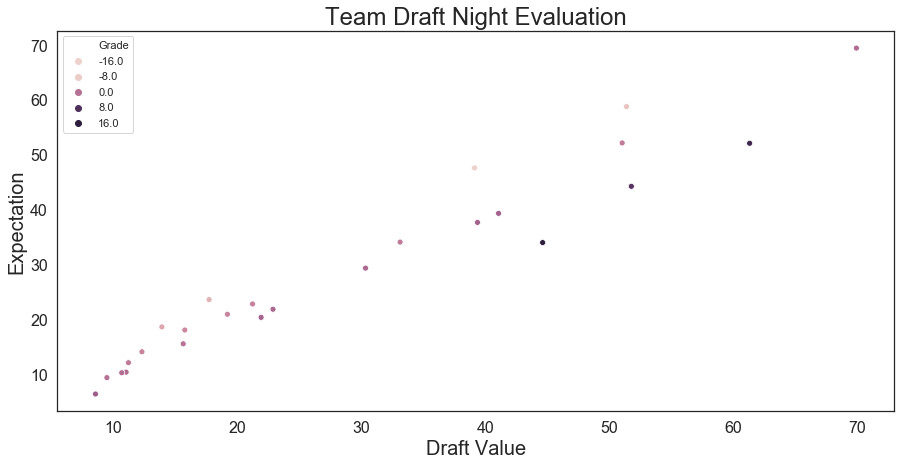

In [497]:
teamdf['Exp'] = teamdf['Value'] - teamdf['Grade']
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="Value", y="Exp", hue="Grade", data=teamdf)
ax.set_title("Team Draft Night Evaluation", fontsize=24)
ax.set_xlabel("Draft Value",fontsize=20)
ax.set_ylabel("Expectation",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()